In [68]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import pickle
import pydotplus
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    LogisticRegression,
    SGDClassifier,
    BayesianRidge,
)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from six import StringIO
from IPython.display import Image
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    BaggingClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.svm import LinearSVC
from numpy.ma.core import sqrt
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from numpy.polynomial.polynomial import polyfit
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    confusion_matrix
)

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('/content/student-mat.csv')

In [3]:
df.shape

(395, 33)

In [4]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [5]:
df.tail()

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[5 rows x 33 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)
print(len(categorical_columns))

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
17


In [8]:
numerical_columns = df.select_dtypes(include=['int64']).columns.tolist()
print(numerical_columns)
print(len(numerical_columns))

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
16


In [9]:
df.describe().T

count       mean       std   min   25%   50%   75%   max
age         395.0  16.696203  1.276043  15.0  16.0  17.0  18.0  22.0
Medu        395.0   2.749367  1.094735   0.0   2.0   3.0   4.0   4.0
Fedu        395.0   2.521519  1.088201   0.0   2.0   2.0   3.0   4.0
traveltime  395.0   1.448101  0.697505   1.0   1.0   1.0   2.0   4.0
studytime   395.0   2.035443  0.839240   1.0   1.0   2.0   2.0   4.0
failures    395.0   0.334177  0.743651   0.0   0.0   0.0   0.0   3.0
famrel      395.0   3.944304  0.896659   1.0   4.0   4.0   5.0   5.0
freetime    395.0   3.235443  0.998862   1.0   3.0   3.0   4.0   5.0
goout       395.0   3.108861  1.113278   1.0   2.0   3.0   4.0   5.0
Dalc        395.0   1.481013  0.890741   1.0   1.0   1.0   2.0   5.0
Walc        395.0   2.291139  1.287897   1.0   1.0   2.0   3.0   5.0
health      395.0   3.554430  1.390303   1.0   3.0   4.0   5.0   5.0
absences    395.0   5.708861  8.003096   0.0   0.0   4.0   8.0  75.0
G1          395.0  10.908861  3.319195   3.0   8.0  11.0  13.0  19.0
G2          395.0  10.713924  3.761505   0.0   9.0  11.0  13.0  19.0
G3          395.0  10.415190  4.581443   0.0   8.0  11.0  14.0  20.0

In [10]:
df.describe(include='object')

school  sex address famsize Pstatus   Mjob   Fjob  reason guardian  \
count     395  395     395     395     395    395    395     395      395   
unique      2    2       2       2       2      5      5       4        3   
top        GP    F       U     GT3       T  other  other  course   mother   
freq      349  208     307     281     354    141    217     145      273   

       schoolsup famsup paid activities nursery higher internet romantic  
count        395    395  395        395     395    395      395      395  
unique         2      2    2          2       2      2        2        2  
top           no    yes   no        yes     yes    yes      yes       no  
freq         344    242  214        201     314    375      329      263

<Figure size 600x400 with 0 Axes>

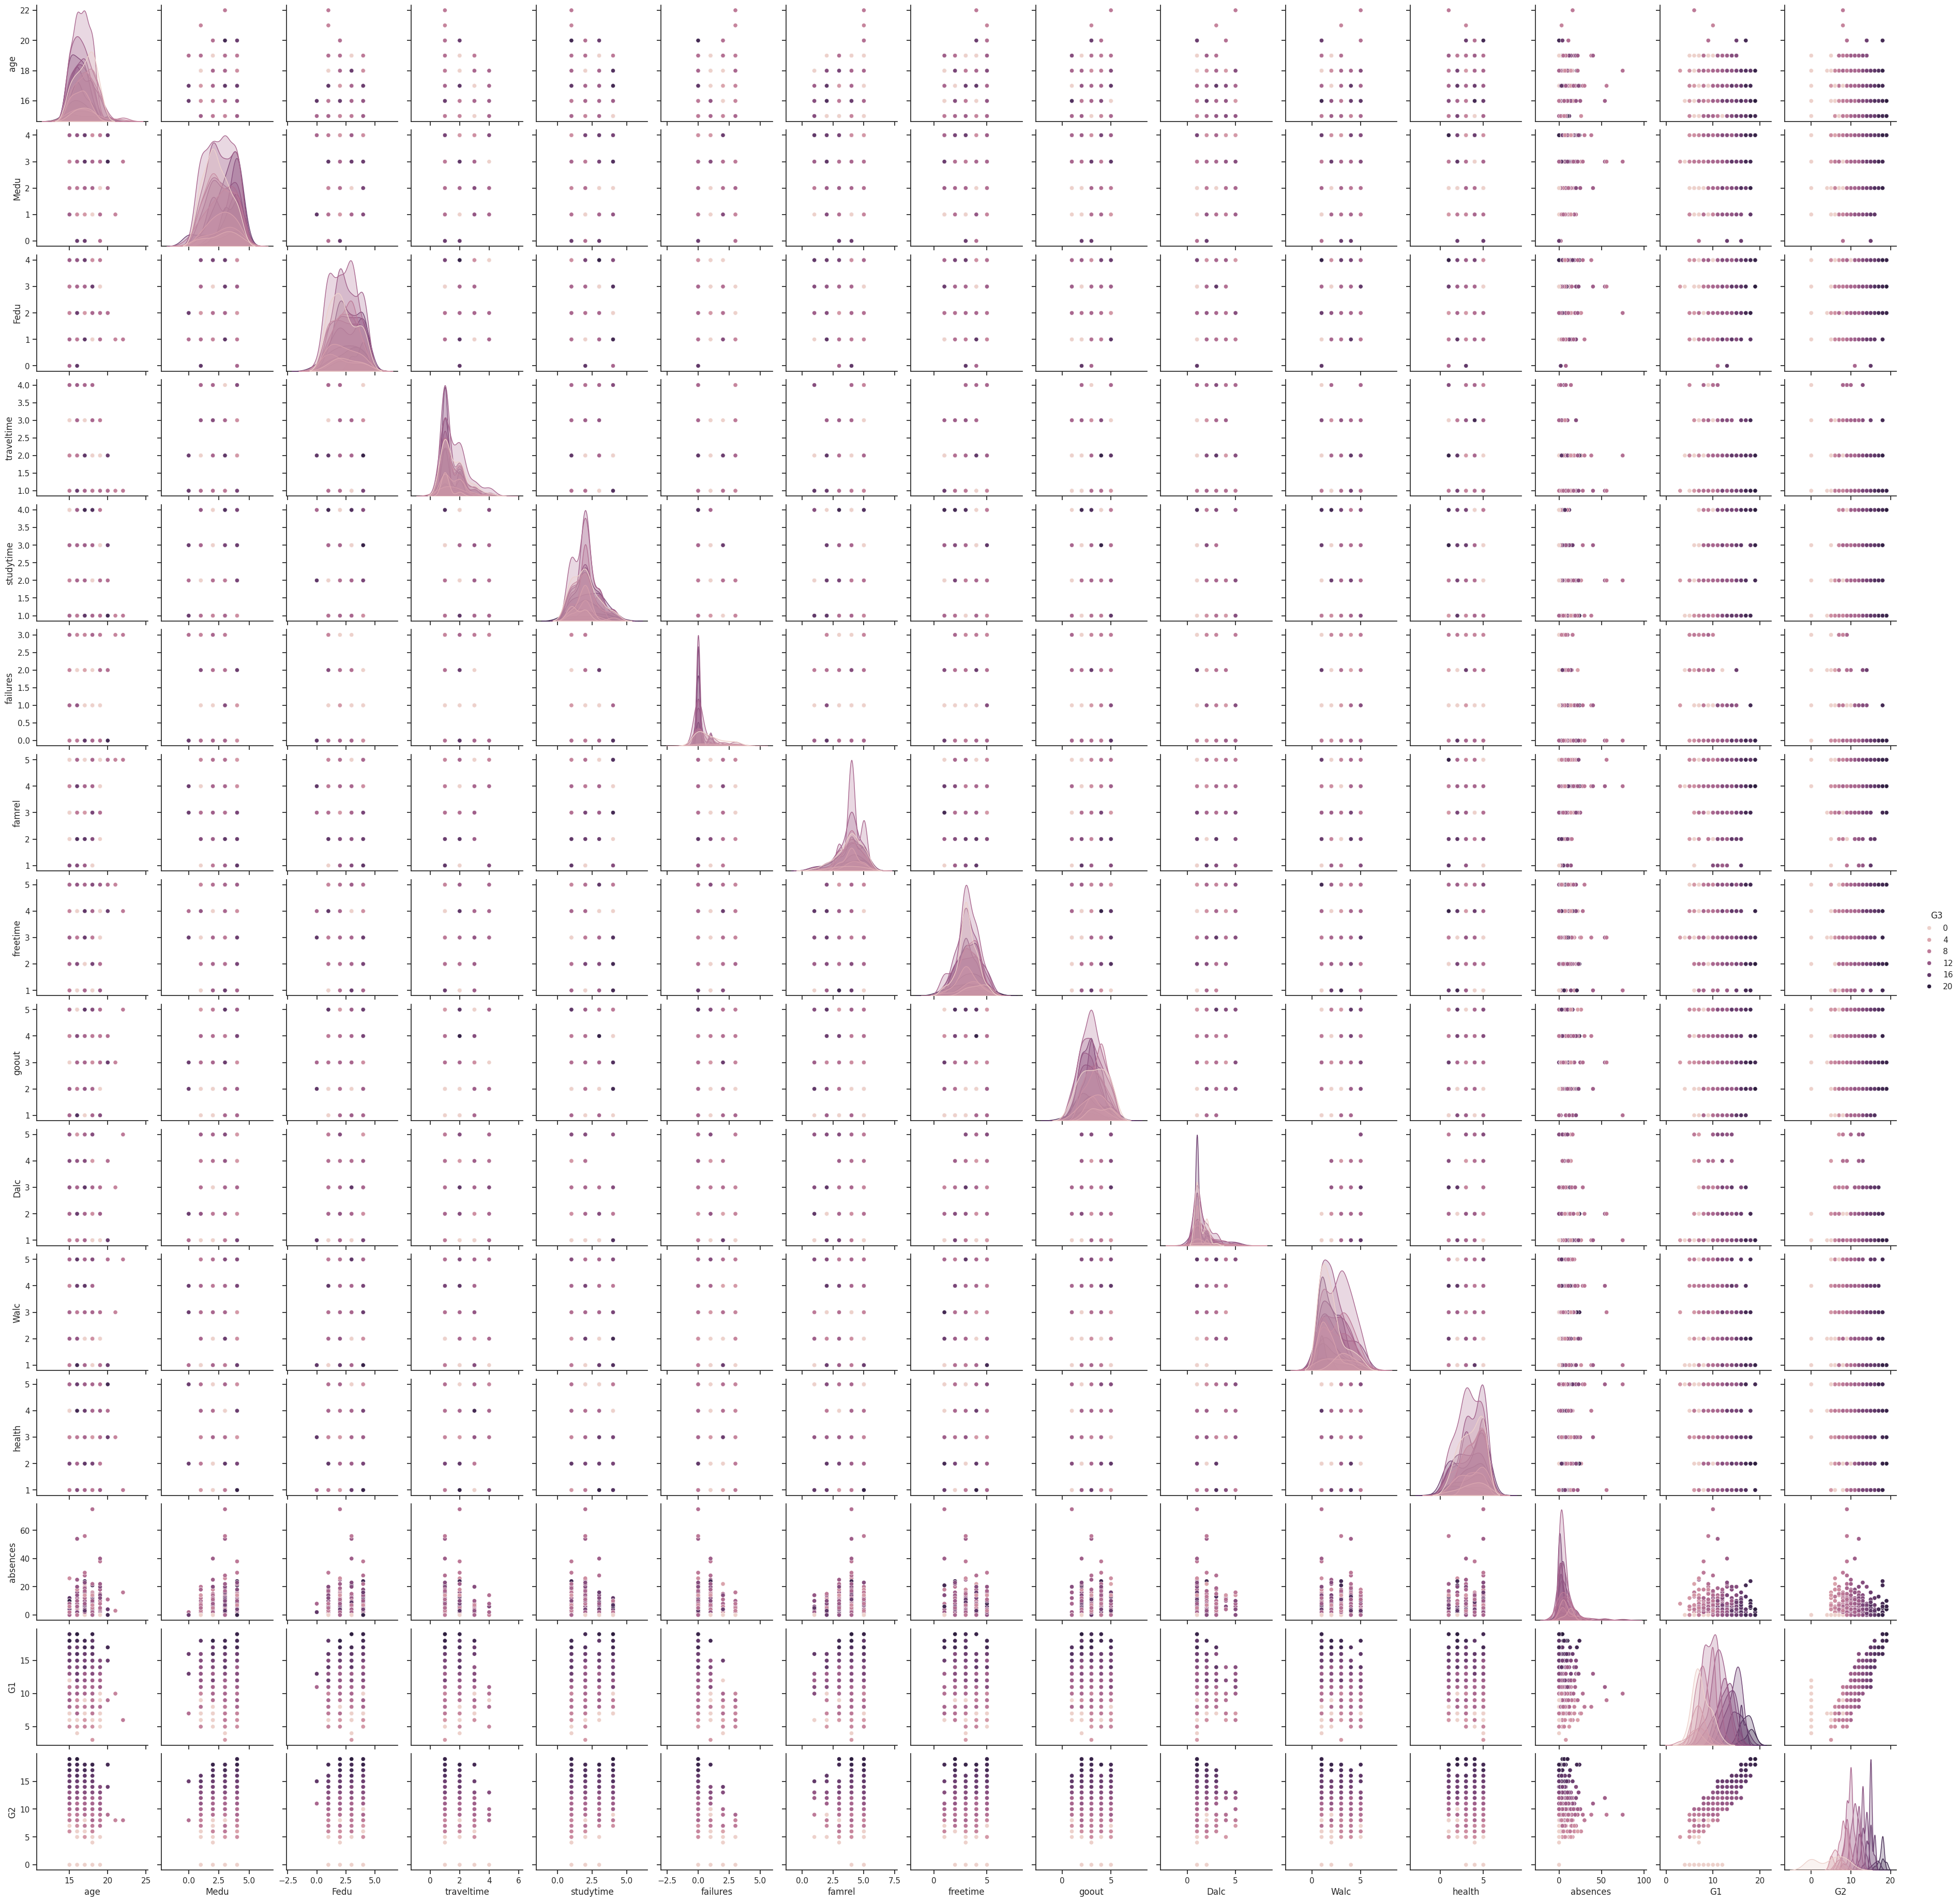

In [11]:
plt.figure(figsize=(6, 4))
sns.set_theme(style="ticks")
sns.pairplot(df, hue="G3")

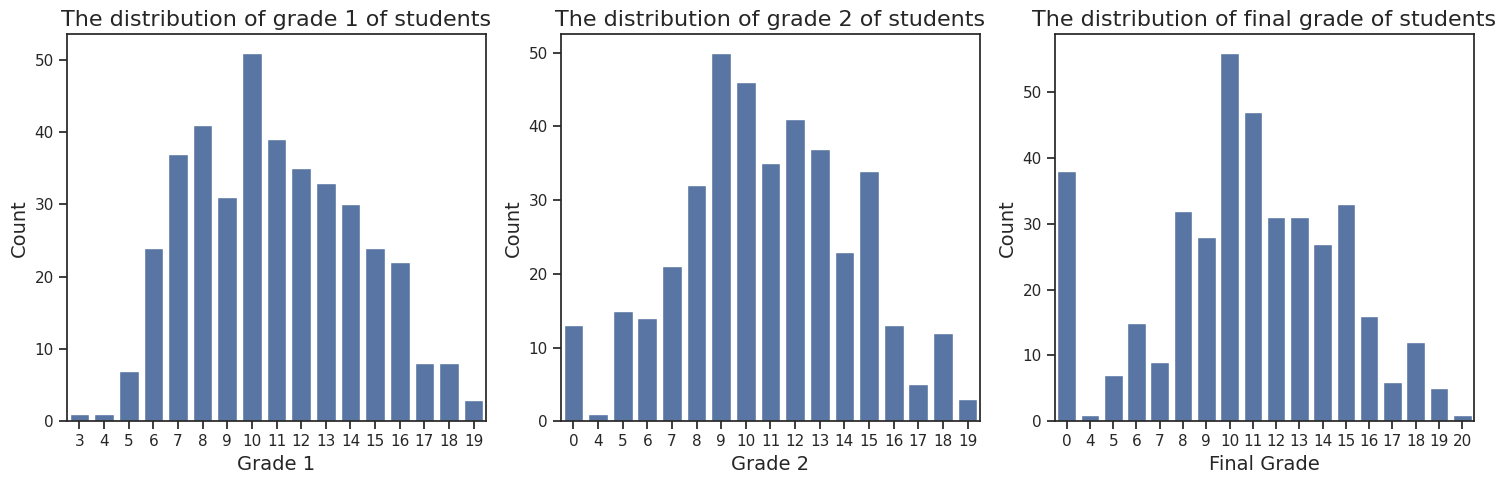

In [12]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot for G1
b1 = sns.countplot(x='G1', data=df, ax=axs[0])
b1.set_title('The distribution of grade 1 of students', fontsize=16)
b1.set_xlabel('Grade 1', fontsize=14)
b1.set_ylabel('Count', fontsize=14)
# Plot for G2
b2 = sns.countplot(x='G2', data=df, ax=axs[1])
b2.set_title('The distribution of grade 2 of students', fontsize=16)
b2.set_xlabel('Grade 2', fontsize=14)
b2.set_ylabel('Count', fontsize=14)

# Plot for G3
b3 = sns.countplot(x='G3', data=df, ax=axs[2])
b3.set_title('The distribution of final grade of students', fontsize=16)
b3.set_xlabel('Final Grade', fontsize=14)
b3.set_ylabel('Count', fontsize=14)
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

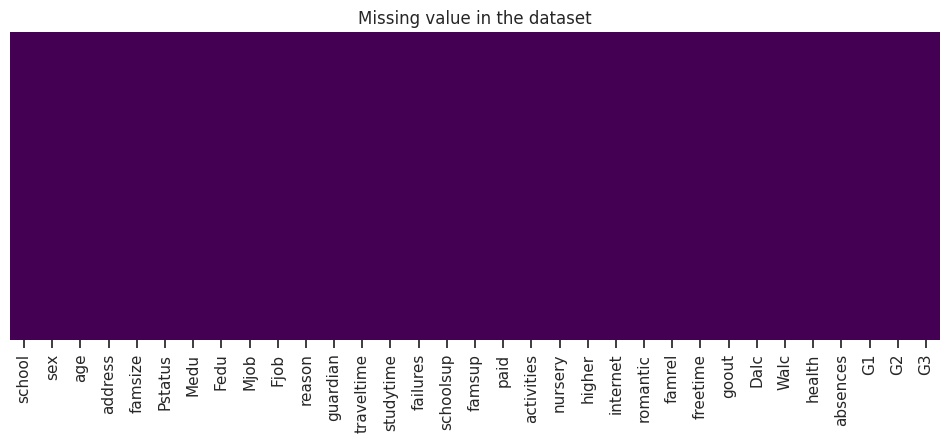

In [13]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

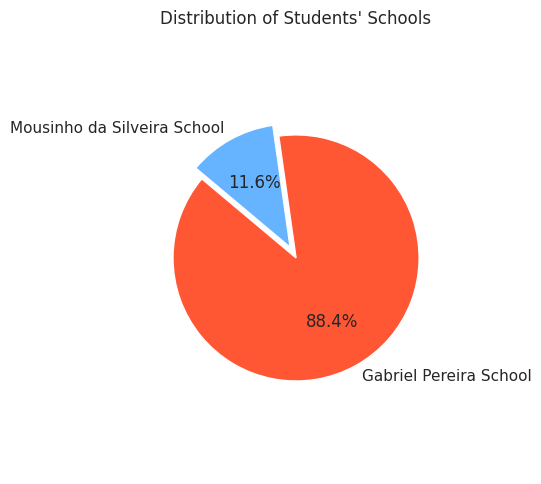

In [14]:
import matplotlib.pyplot as plt

# Calculate percentage values
total = len(df)
value_counts = df['school'].value_counts()
percentages = value_counts / total * 100

# Rename the labels from 'GP' and 'MS' to custom names
value_counts.index = ['Gabriel Pereira School', 'Mousinho da Silveira School']
# Define custom colors
custom_colors = ['#ff5733', '#66b3ff']  # A vibrant red and a bright blue

# Define an explode parameter to separate one of the sections
explode = (0.1, 0)  # This will explode the first section (Gabriel Pereira School) slightly

# Create a pie chart with custom colors and explode parameter
plt.figure(figsize=(5, 5))
plt.pie(
    percentages,
    labels=value_counts.index,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140,
    colors=custom_colors,
    explode=explode  # Add the explode parameter here
)
# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title("Distribution of Students' Schools")

# Show the plot
plt.tight_layout()
plt.show()

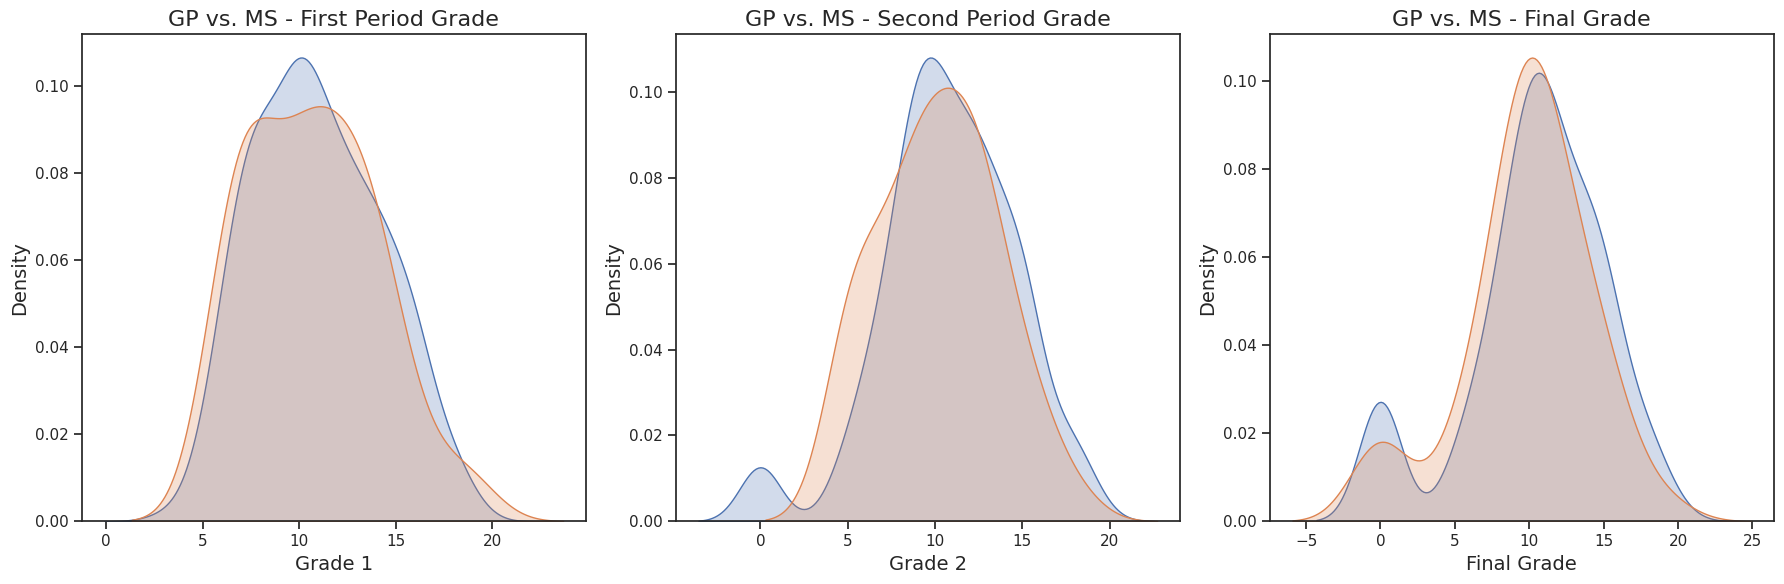

In [20]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grade distribution by school for G1
sns.kdeplot(df.loc[df['school'] == 'GP', 'G1'], label='GP', shade=True, ax=axs[0])
sns.kdeplot(df.loc[df['school'] == 'MS', 'G1'], label='MS', shade=True, ax=axs[0])
axs[0].set_title('GP vs. MS - First Period Grade', fontsize=16)
axs[0].set_xlabel('Grade 1', fontsize=14)
axs[0].set_ylabel('Density', fontsize=14)

# Grade distribution by school for G2
sns.kdeplot(df.loc[df['school'] == 'GP', 'G2'], label='GP', shade=True, ax=axs[1])
sns.kdeplot(df.loc[df['school'] == 'MS', 'G2'], label='MS', shade=True, ax=axs[1])
axs[1].set_title('GP vs. MS - Second Period Grade', fontsize=16)
axs[1].set_xlabel('Grade 2', fontsize=14)
axs[1].set_ylabel('Density', fontsize=14)
# Grade distribution by school for G3
sns.kdeplot(df.loc[df['school'] == 'GP', 'G3'], label='GP', shade=True, ax=axs[2])
sns.kdeplot(df.loc[df['school'] == 'MS', 'G3'], label='MS', shade=True, ax=axs[2])
axs[2].set_title('GP vs. MS - Final Grade', fontsize=16)
axs[2].set_xlabel('Final Grade', fontsize=14)
axs[2].set_ylabel('Density', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

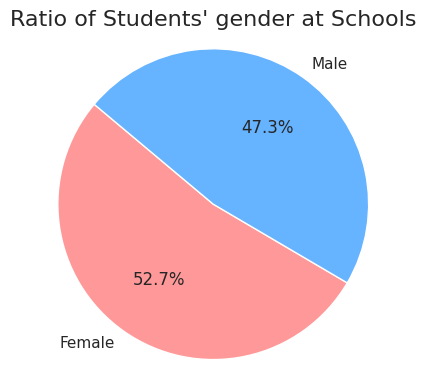

In [17]:
# Calculate percentage values
total = len(df)
value_counts = df['sex'].value_counts()
percentages = value_counts / total * 100

# Rename the labels from 'F' and 'M' to custom names
value_counts.index = ['Female', 'Male']

# Define custom colors
custom_colors = ['#ff9999', '#66b3ff']  # You can change these colors as desired
# Define an explode parameter to separate one of the sections
#explode = (0.061, 0)  # This will explode the first section (Female) slightly

# Create a pie chart with custom colors and explode parameter
plt.figure(figsize=(4, 4))
plt.pie(
    percentages,
    labels=value_counts.index,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140,
    colors=custom_colors,
    #explode=explode  # Add the explode parameter here
)
# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')

# Add a title
plt.title("Ratio of Students' gender at Schools", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

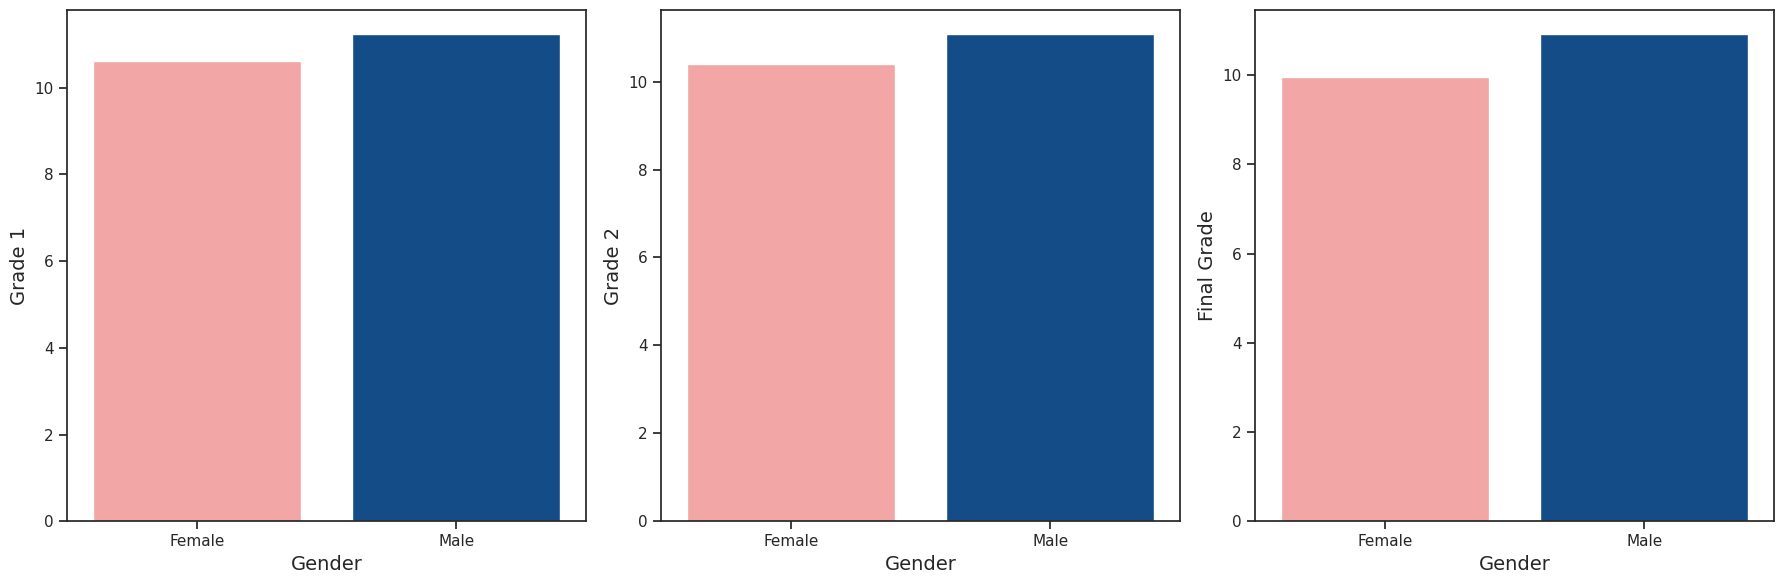

In [21]:
# Define custom colors
custom_colors = ['#ff9999', '#004c99']  # Darker blue color for the second bar, you can change these colors as desired

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for G1 with custom colors
sns.barplot(x='sex', y='G1', data=df, ci=None, ax=axs[0], palette=custom_colors)
axs[0].set_xlabel('Gender', fontsize=14)
axs[0].set_ylabel('Grade 1', fontsize=14)
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(["Female", "Male"])
# Plot for G2 with custom colors
sns.barplot(x='sex', y='G2', data=df, ci=None, ax=axs[1], palette=custom_colors)
axs[1].set_xlabel('Gender', fontsize=14)
axs[1].set_ylabel('Grade 2', fontsize=14)
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(["Female", "Male"])

# Plot for G3 with custom colors
sns.barplot(x='sex', y='G3', data=df, ci=None, ax=axs[2], palette=custom_colors)
axs[2].set_xlabel('Gender', fontsize=14)
axs[2].set_ylabel('Final Grade', fontsize=14)
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(["Female", "Male"])
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

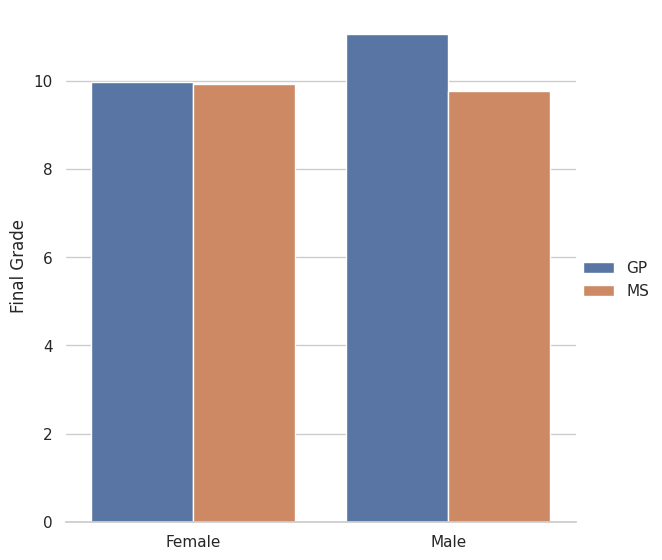

In [32]:
custom_colors = ['#ff9999', '#66b3ff']  # You can change these colors as desired
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="bar",
    x="sex", y="G3", hue="school",
    errorbar="sd", height=6, ci=None
)
g.despine(left=True)
custom_xtitles = ["Female", "Male"]
g.set_xticklabels(custom_xtitles)
g.set_axis_labels("", "Final Grade")
g.legend.set_title("")

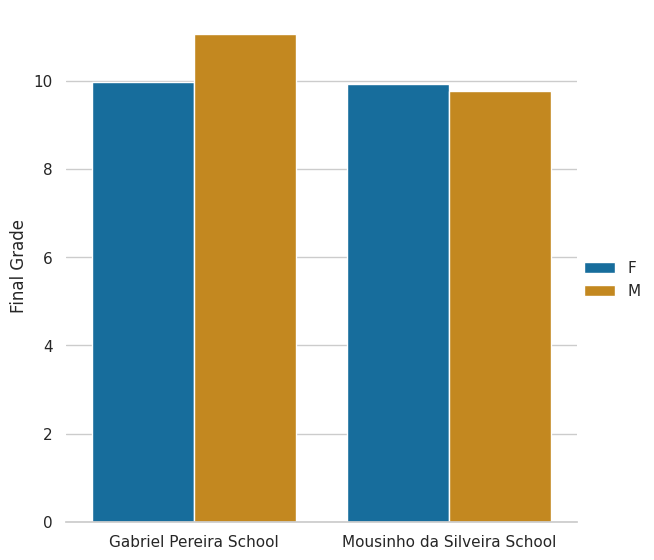

In [24]:
# Set a custom color palette
custom_palette = sns.color_palette("colorblind")

# Set the Seaborn style with the custom color palette
sns.set_theme(style="whitegrid", palette=custom_palette)

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="school", y="G3", hue="sex",
    errorbar="sd", height=6, ci=None
)
g.despine(left=True)
new_x_labels = ["Gabriel Pereira School", "Mousinho da Silveira School"]  # Modify these labels as needed
plt.xticks(range(len(new_x_labels)), new_x_labels)

g.set_axis_labels("", "Final Grade")

g.legend.set_title("")

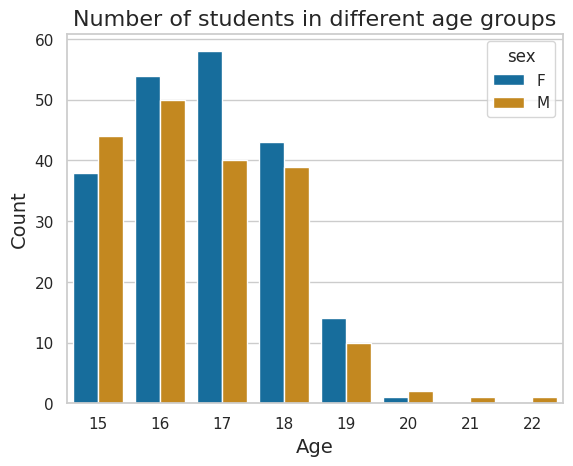

In [25]:
b = sns.countplot(x='age', hue='sex', data=df)
b.axes.set_title('Number of students in different age groups', fontsize=16)
b.set_xlabel("Age", fontsize=14)
b.set_ylabel("Count", fontsize=14)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


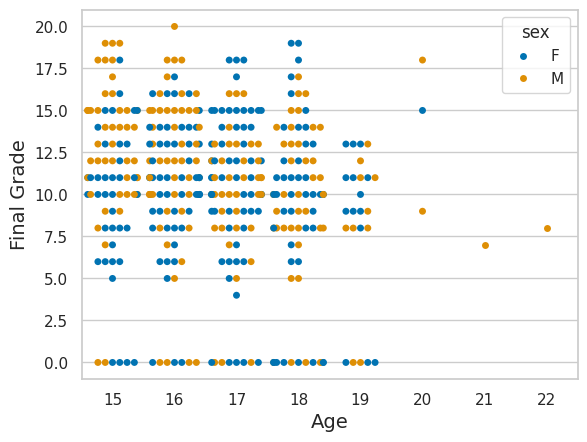

In [26]:
b = sns.swarmplot(x='age', y='G3',hue='sex', data=df)
b.set_xlabel('Age', fontsize = 14)
b.set_ylabel('Final Grade', fontsize = 14)
plt.show()

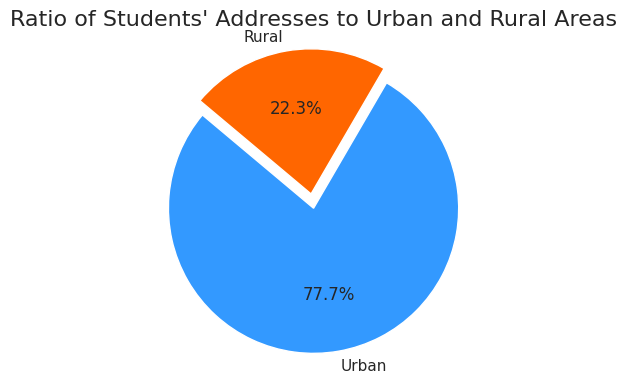

In [27]:
import matplotlib.pyplot as plt

# Calculate percentage values
total = len(df)
value_counts = df['address'].value_counts()
percentages = value_counts / total * 100

# Define custom colors for each part
colors = ['#3399ff', '#ff6600']

# Define the amount of space between the parts
explode = (0.1, 0)

# Define custom labels for the parts
custom_labels = ['Urban', 'Rural']
# Create a pie chart
plt.figure(figsize=(4, 4))  # Adjust the figure size if needed
plt.pie(
    percentages,
    labels=custom_labels,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140,
    colors=colors,  # Use custom colors
    explode=explode,  # Add space between parts
)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
# Update the title
plt.title("Ratio of Students' Addresses to Urban and Rural Areas", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-33-938bf94b03cf>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(["Urban", "Rural"])
<ipython-input-33-938bf94b03cf>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(["Urban", "Rural"])
<ipython-input-33-938bf94b03cf>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(["Urban", "Rural"])


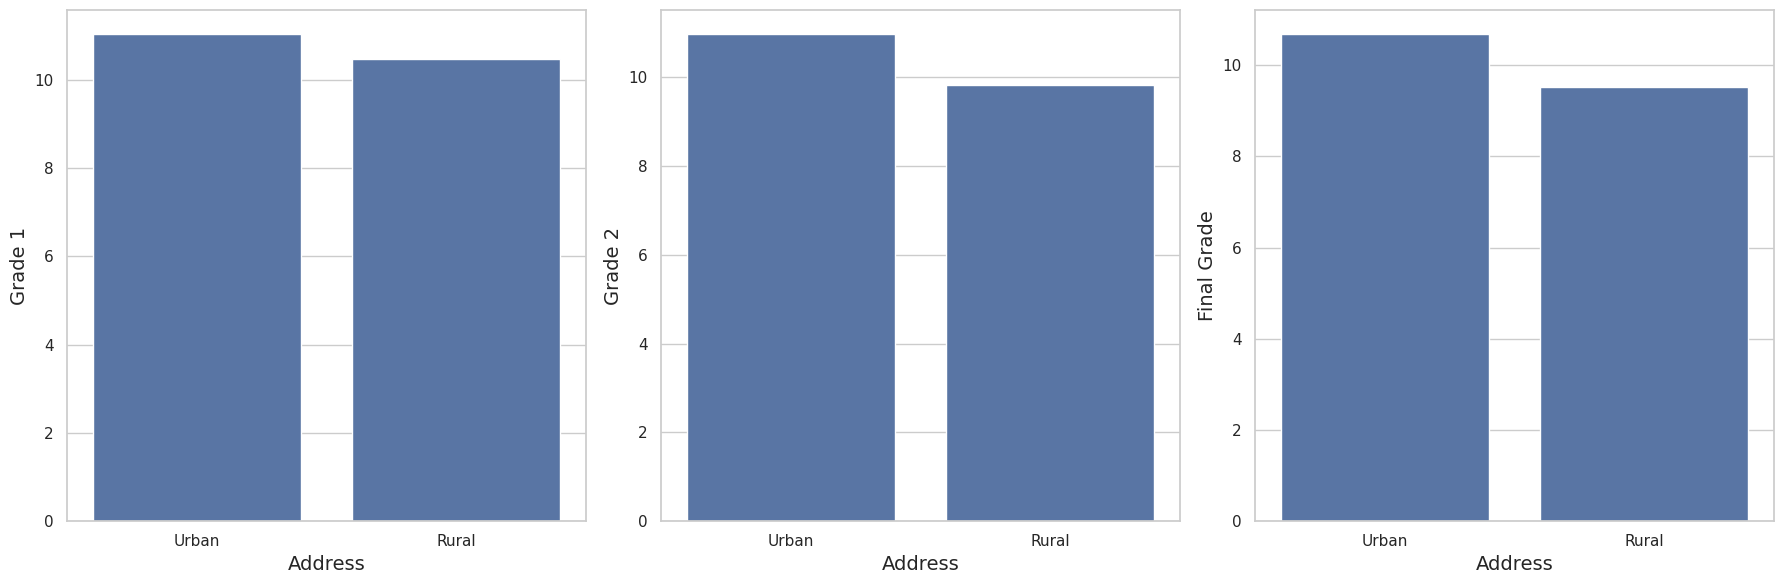

In [33]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grade 1 plot
sns.barplot(x=df['address'], y=df['G1'], data=df, ci=None, ax=axs[0])
axs[0].set_xlabel('Address', fontsize=14)
axs[0].set_ylabel('Grade 1', fontsize=14)
axs[0].set_xticklabels(["Urban", "Rural"])

# Grade 2 plot
sns.barplot(x=df['address'], y=df['G2'], data=df, ci=None, ax=axs[1])
axs[1].set_xlabel('Address', fontsize=14)
axs[1].set_ylabel('Grade 2', fontsize=14)
axs[1].set_xticklabels(["Urban", "Rural"])
# Final Grade plot
sns.barplot(x=df['address'], y=df['G3'], data=df, ci=None, ax=axs[2])
axs[2].set_xlabel('Address', fontsize=14)
axs[2].set_ylabel('Final Grade', fontsize=14)
axs[2].set_xticklabels(["Urban", "Rural"])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


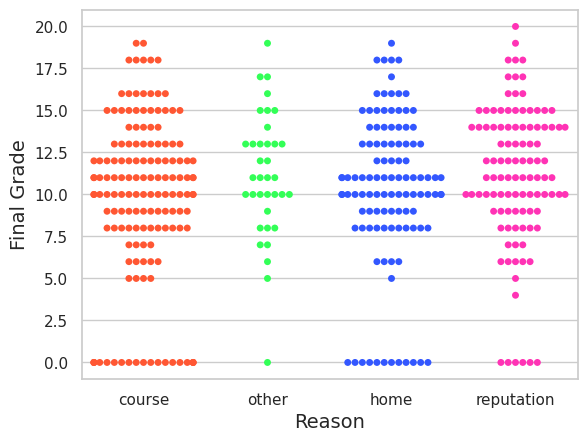

In [29]:
custom_palette = ["#FF5733", "#33FF57", "#3357FF", "#FF33B5"]
b = sns.swarmplot(x='reason', y='G3', data=df,palette=custom_palette)
b.set_xlabel('Reason', fontsize = 14)
b.set_ylabel('Final Grade', fontsize = 14)
plt.show()

<ipython-input-34-af6350b75c38>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b1.set_xticklabels(["Greater Than Three", "Less Than Three"])
<ipython-input-34-af6350b75c38>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b2.set_xticklabels(["Greater Than Three", "Less Than Three"])
<ipython-input-34-af6350b75c38>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b3.set_xticklabels(["Greater Than Three", "Less Than Three"])


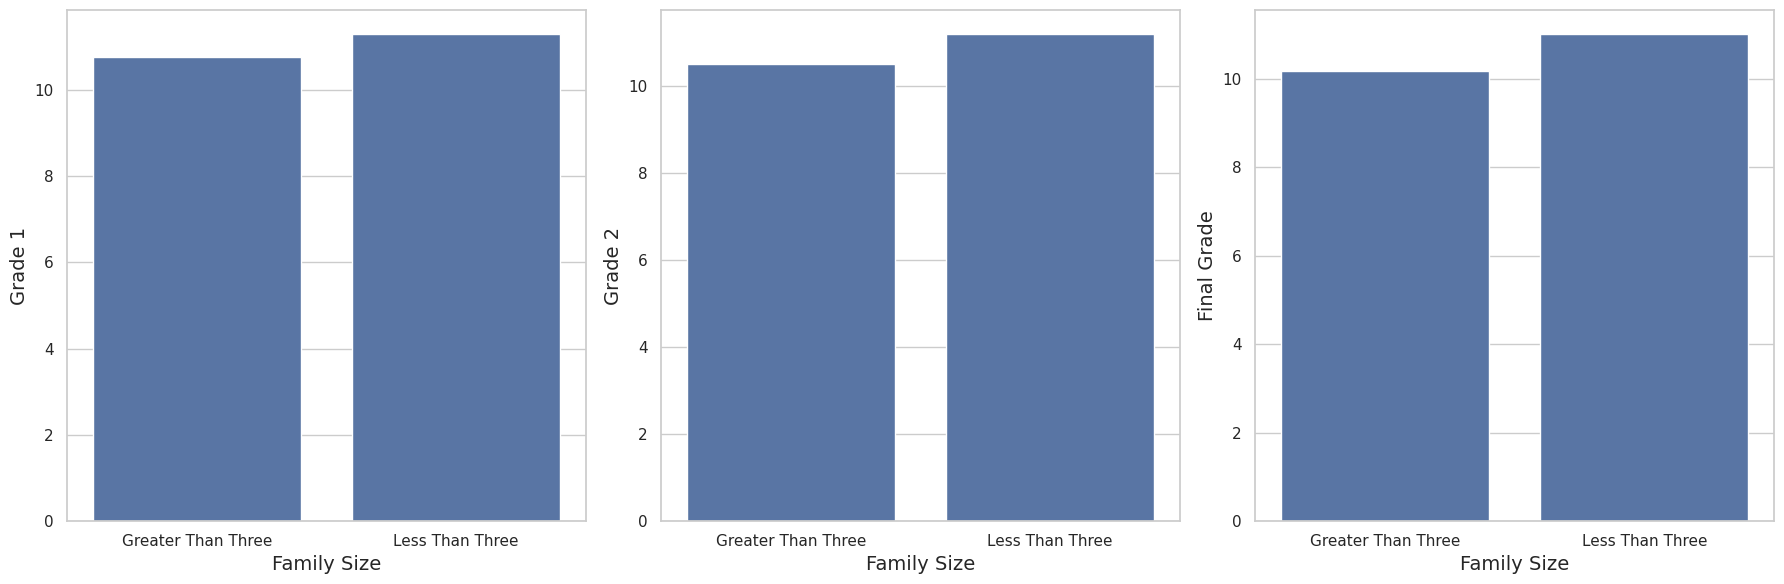

In [34]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grade 1 plot
b1 = sns.barplot(x=df['famsize'], y=df['G1'], data=df, ci=None, ax=axs[0])
b1.set_xlabel('Family Size', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(["Greater Than Three", "Less Than Three"])

# Grade 2 plot
b2 = sns.barplot(x=df['famsize'], y=df['G2'], data=df, ci=None, ax=axs[1])
b2.set_xlabel('Family Size', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(["Greater Than Three", "Less Than Three"])
# Final Grade plot
b3 = sns.barplot(x=df['famsize'], y=df['G3'], data=df, ci=None, ax=axs[2])
b3.set_xlabel('Family Size', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(["Greater Than Three", "Less Than Three"])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<ipython-input-35-7f79e70d9e92>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b1.set_xticklabels(["Apart", "Living Together"])
<ipython-input-35-7f79e70d9e92>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b2.set_xticklabels(["Apart", "Living Together"])
<ipython-input-35-7f79e70d9e92>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b3.set_xticklabels(["Apart", "Living Together"])


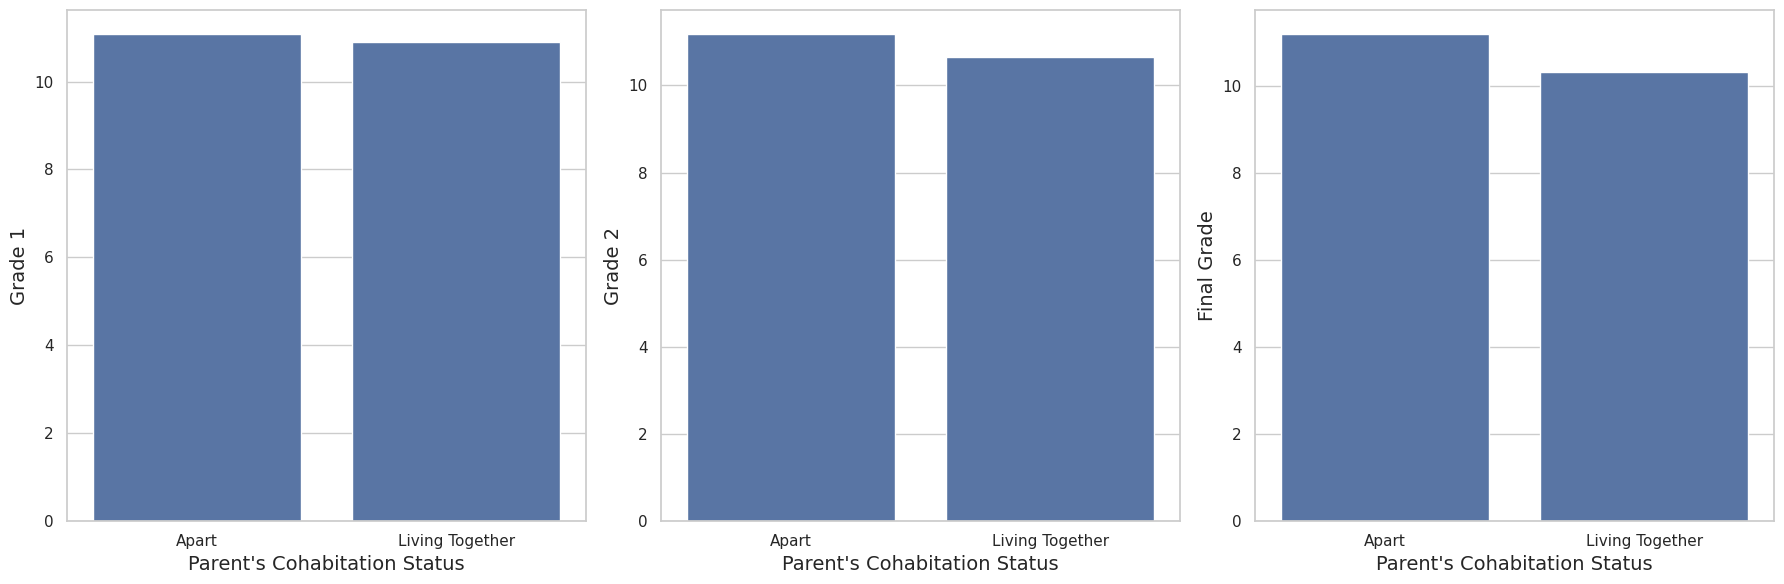

In [35]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grade 1 plot
b1 = sns.barplot(x=df['Pstatus'], y=df['G1'], data=df, ci=None, ax=axs[0])
b1.set_xlabel("Parent's Cohabitation Status", fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(["Apart", "Living Together"])

# Grade 2 plot
b2 = sns.barplot(x=df['Pstatus'], y=df['G2'], data=df, ci=None, ax=axs[1])
b2.set_xlabel("Parent's Cohabitation Status", fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(["Apart", "Living Together"])
# Final Grade plot
b3 = sns.barplot(x=df['Pstatus'], y=df['G3'], data=df, ci=None, ax=axs[2])
b3.set_xlabel("Parent's Cohabitation Status", fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(["Apart", "Living Together"])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<ipython-input-36-1149b46af057>:27: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


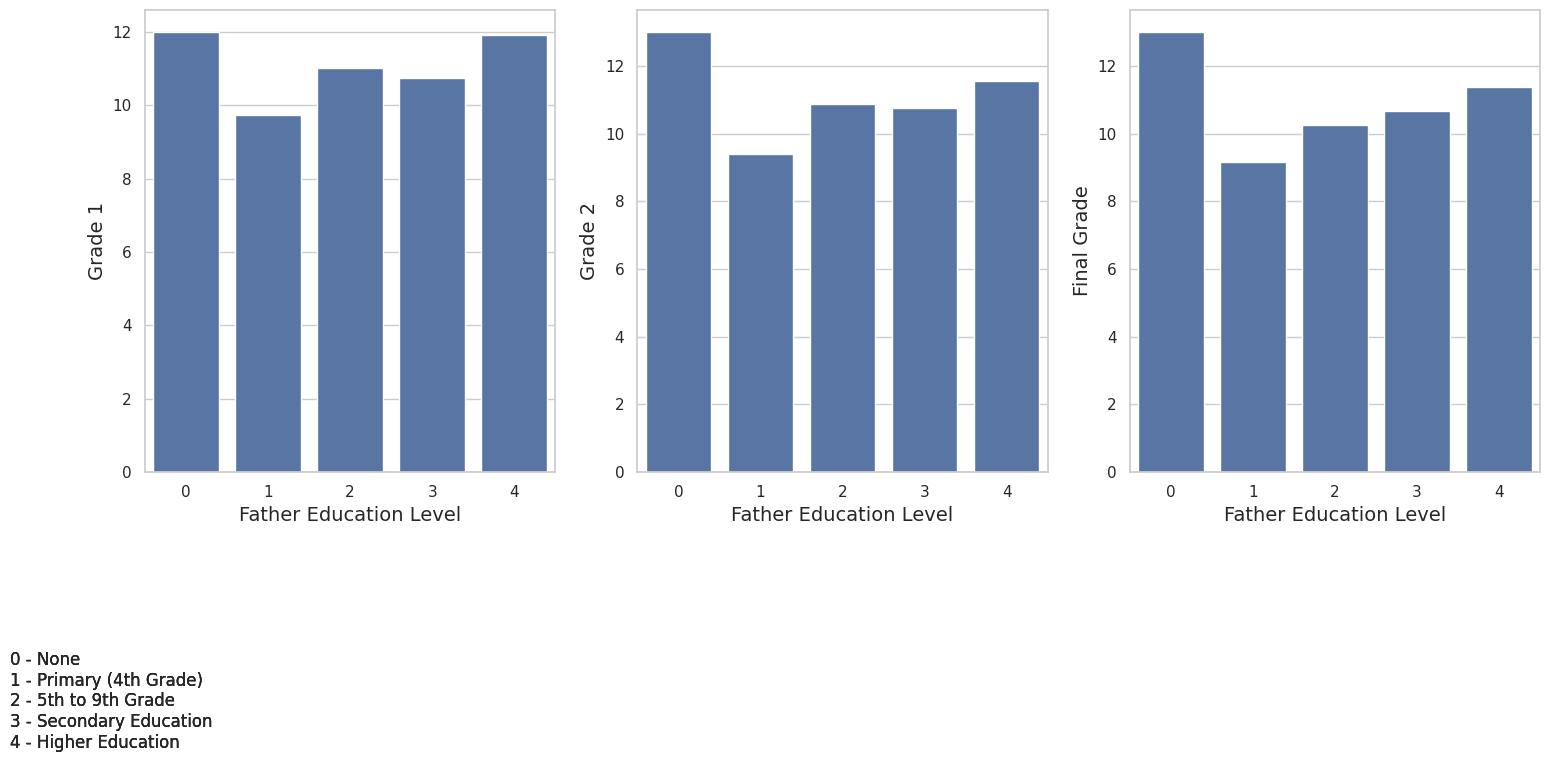

In [36]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
education_descriptions = [
    "0 - None",
    "1 - Primary (4th Grade)",
    "2 - 5th to 9th Grade",
    "3 - Secondary Education",
    "4 - Higher Education"
]
# Grade 1 plot
b1 = sns.barplot(x='Fedu', y='G1', data=df, ci=None, ax=axs[0])
b1.set_xlabel("Father Education Level", fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.text(0.05, -0.35, '\n'.join(education_descriptions), fontsize=12, transform=plt.gcf().transFigure)
# Grade 2 plot
b2 = sns.barplot(x='Fedu', y='G2', data=df, ci=None, ax=axs[1])
b2.set_xlabel("Father Education Level", fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.text(0.05, -0.35, '\n'.join(education_descriptions), fontsize=12, transform=plt.gcf().transFigure)

# Final Grade plot
b3 = sns.barplot(x='Fedu', y='G3', data=df, ci=None, ax=axs[2])
b3.set_xlabel("Father Education Level", fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.text(0.05, -0.35, '\n'.join(education_descriptions), fontsize=12, transform=plt.gcf().transFigure)
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

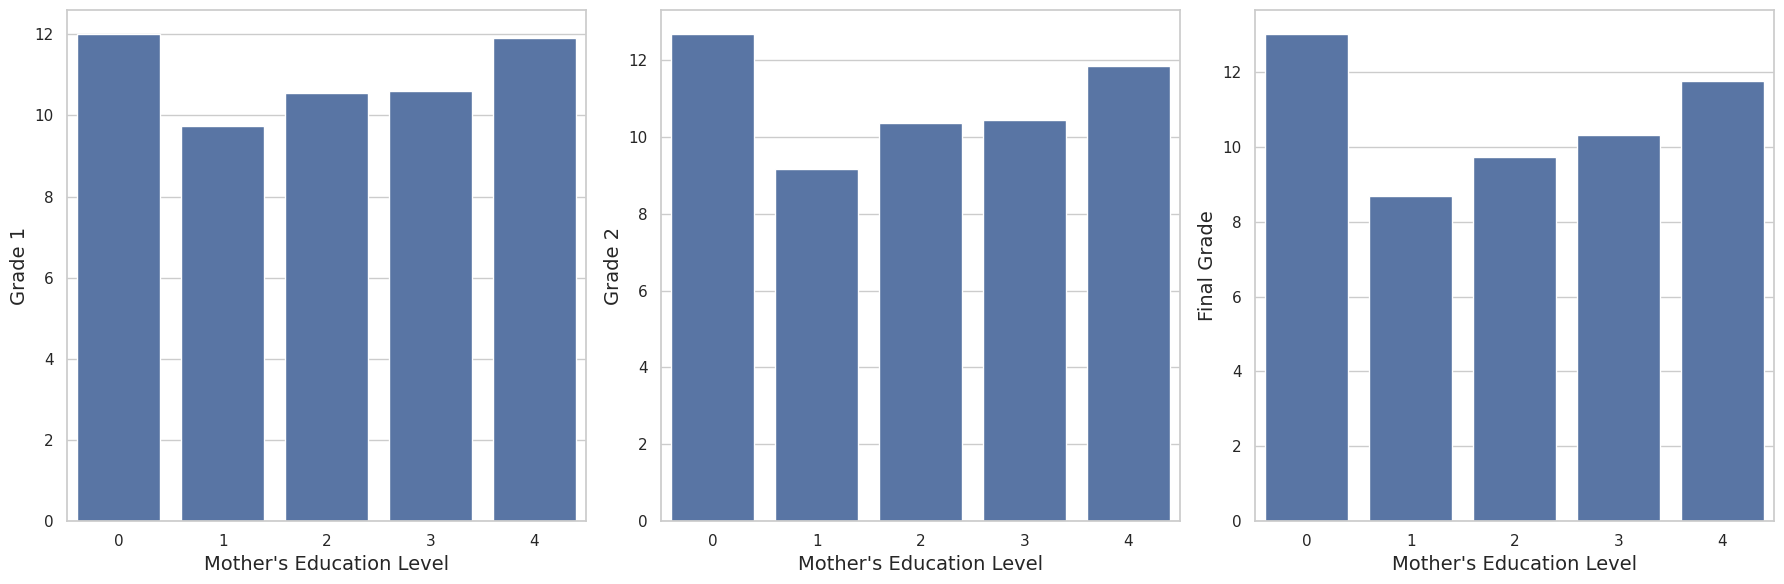

In [37]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grade 1 plot
b1 = sns.barplot(x=df['Medu'], y=df['G1'], data=df, ci=None, ax=axs[0])
b1.set_xlabel("Mother's Education Level", fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)

# Grade 2 plot
b2 = sns.barplot(x=df['Medu'], y=df['G2'], data=df, ci=None, ax=axs[1])
b2.set_xlabel("Mother's Education Level", fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
# Final Grade plot
b3 = sns.barplot(x=df['Medu'], y=df['G3'], data=df, ci=None, ax=axs[2])
b3.set_xlabel("Mother's Education Level", fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)

# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

<ipython-input-38-269a66f4e199>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b1.set_xticklabels(["Teacher", "Other", "Services", "Health", "At Home"])
<ipython-input-38-269a66f4e199>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b2.set_xticklabels(["Teacher", "Other", "Services", "Health", "At Home"])
<ipython-input-38-269a66f4e199>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b3.set_xticklabels(["Teacher", "Other", "Services", "Health", "At Home"])


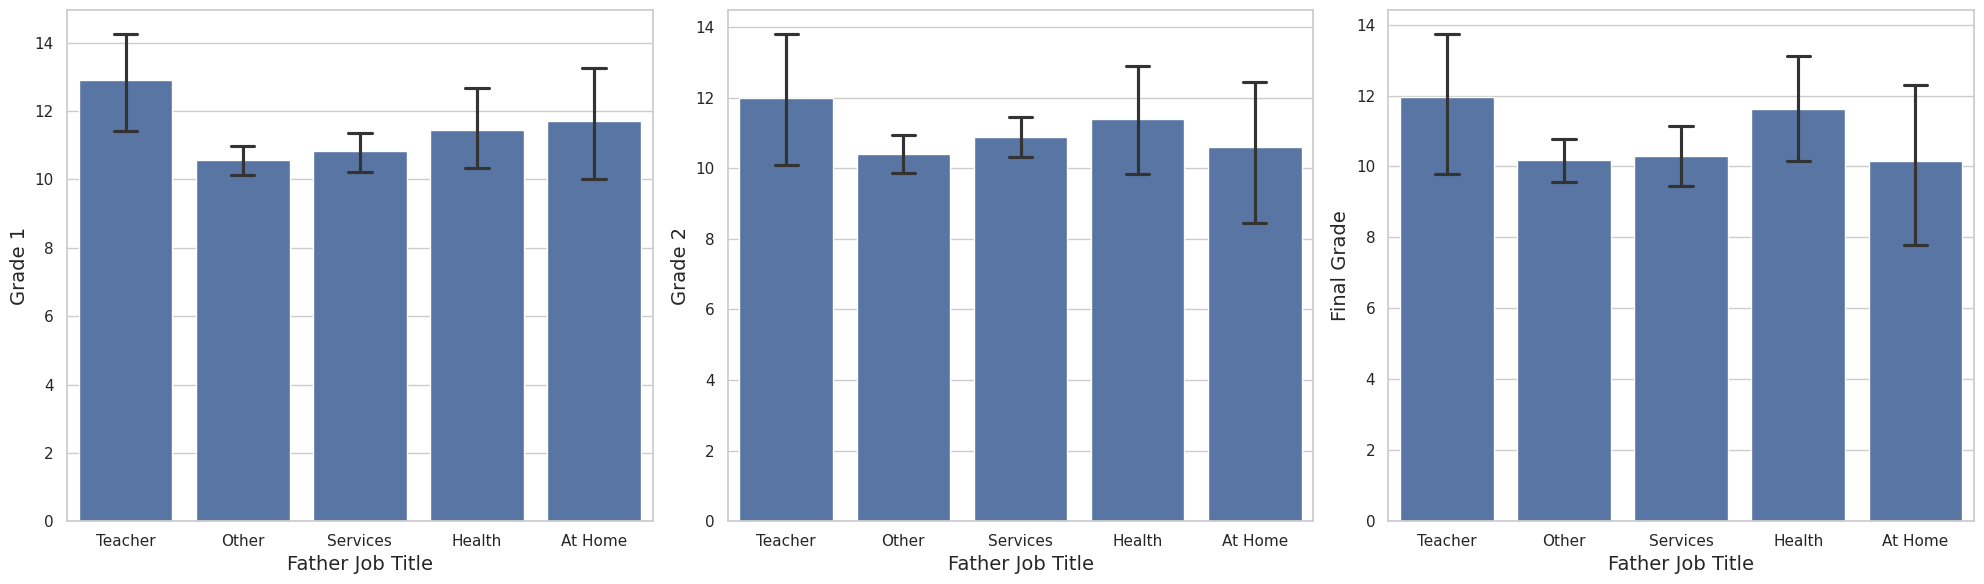

In [38]:
# Create a figure with three subplots arranged in a row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot the first chart
b1 = sns.barplot(x=df['Fjob'], y=df['G1'], data=df, ax=ax1, errcolor='0.2', capsize=0.2)
b1.set_xlabel('Father Job Title', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(["Teacher", "Other", "Services", "Health", "At Home"])

# Plot the second chart
b2 = sns.barplot(x=df['Fjob'], y=df['G2'], data=df, ax=ax2, errcolor='0.2', capsize=0.2)
b2.set_xlabel('Father Job Title', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(["Teacher", "Other", "Services", "Health", "At Home"])
# Plot the third chart
b3 = sns.barplot(x=df['Fjob'], y=df['G3'], data=df, ax=ax3, errcolor='0.2', capsize=0.2)
b3.set_xlabel('Father Job Title', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(["Teacher", "Other", "Services", "Health", "At Home"])

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

<ipython-input-39-a19e425de33f>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b1.set_xticklabels(["At Home", "Health", "Other", "Services", "Teacher"])
<ipython-input-39-a19e425de33f>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b2.set_xticklabels(["At Home", "Health", "Other", "Services", "Teacher"])
<ipython-input-39-a19e425de33f>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b3.set_xticklabels(["At Home", "Health", "Other", "Services", "Teacher"])


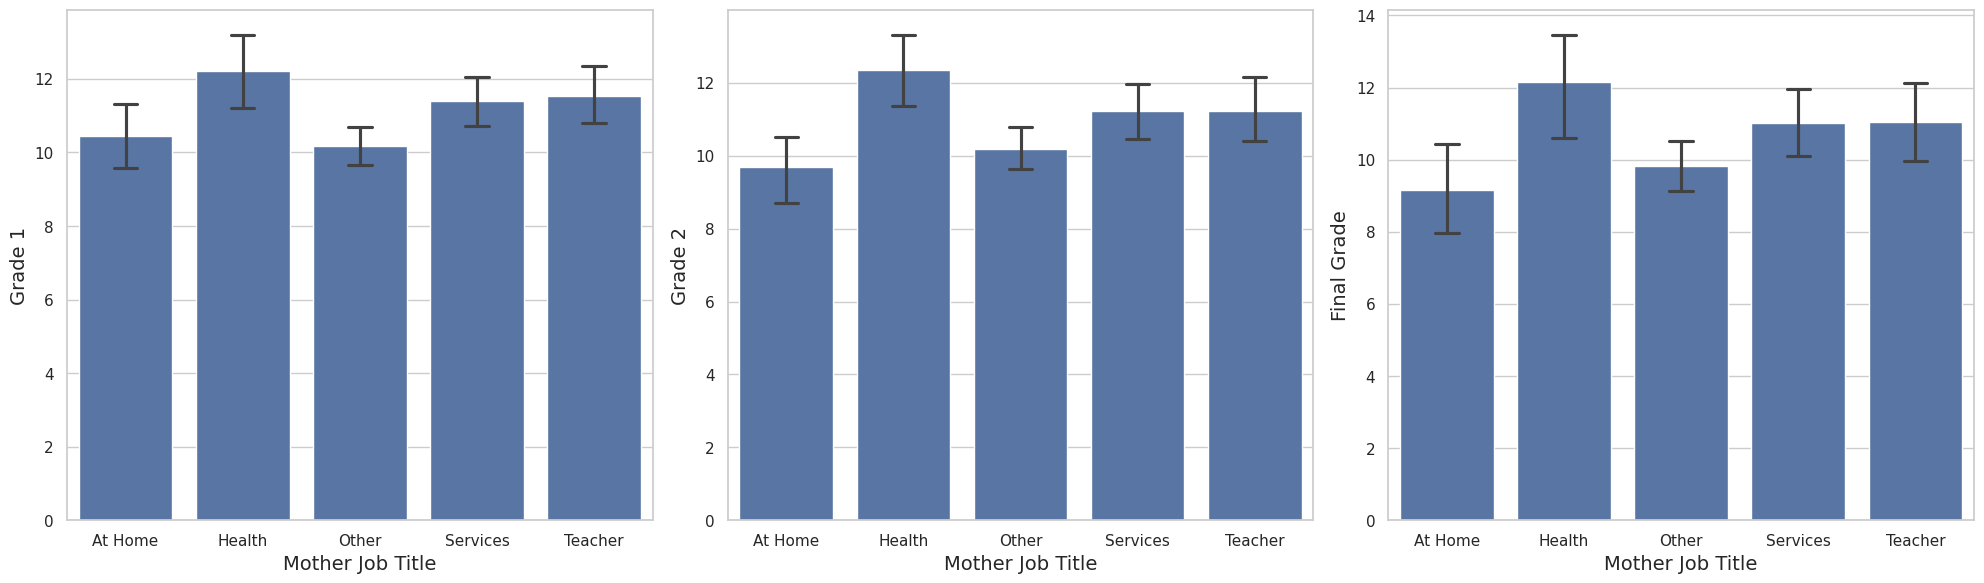

In [39]:
# Create a figure with three subplots arranged in a row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot the first chart
b1 = sns.barplot(x=df['Mjob'], y=df['G1'], data=df, ax=ax1, errcolor=None, capsize=0.2)
b1.set_xlabel('Mother Job Title', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(["At Home", "Health", "Other", "Services", "Teacher"])

# Plot the second chart
b2 = sns.barplot(x=df['Mjob'], y=df['G2'], data=df, ax=ax2, errcolor=None, capsize=0.2)
b2.set_xlabel('Mother Job Title', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(["At Home", "Health", "Other", "Services", "Teacher"])
# Plot the third chart
b3 = sns.barplot(x=df['Mjob'], y=df['G3'], data=df, ax=ax3, errcolor=None, capsize=0.2)
b3.set_xlabel('Mother Job Title', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(["At Home", "Health", "Other", "Services", "Teacher"])

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

<ipython-input-40-50734925bbab>:33: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


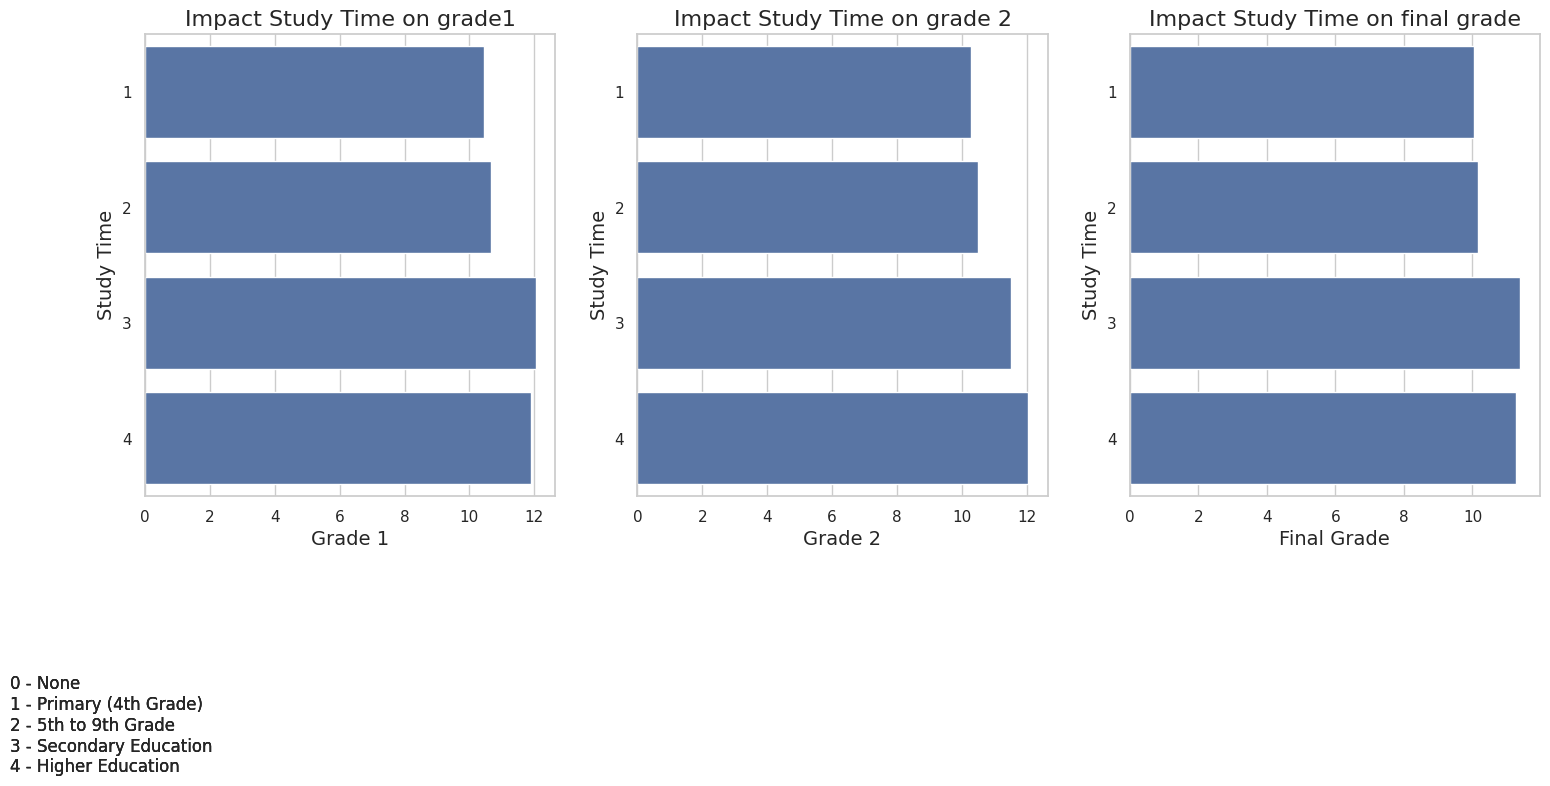

In [40]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
study_times = [
    "0 - None",
    "1 - Primary (4th Grade)",
    "2 - 5th to 9th Grade",
    "3 - Secondary Education",
    "4 - Higher Education"
]


# Create the first horizontal bar plot
b1 = sns.barplot(x=df['G1'], y=df['studytime'], data=df, ci=None, ax=axs[0], orient='h')
b1.set_ylabel('Study Time', fontsize=14)
b1.set_xlabel('Grade 1', fontsize=14)
b1.set_title('Impact Study Time on grade1', fontsize=16)
b1.text(0.05, -0.35, '\n'.join(study_times), fontsize=12, transform=plt.gcf().transFigure)
# Create the second horizontal bar plot
b2 = sns.barplot(x=df['G2'], y=df['studytime'], data=df, ci=None, ax=axs[1], orient='h')
b2.set_ylabel('Study Time', fontsize=14)
b2.set_xlabel('Grade 2', fontsize=14)
b2.set_title('Impact Study Time on grade 2', fontsize=16)
b2.text(0.05, -0.35, '\n'.join(study_times), fontsize=12, transform=plt.gcf().transFigure)


# Create the third horizontal bar plot
b3 = sns.barplot(x=df['G3'], y=df['studytime'], data=df, ci=None, ax=axs[2], orient='h')
b3.set_ylabel('Study Time', fontsize=14)
b3.set_xlabel('Final Grade', fontsize=14)
b3.set_title('Impact Study Time on final grade', fontsize=16)
b3.text(0.05, -0.35, '\n'.join(study_times), fontsize=12, transform=plt.gcf().transFigure)
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

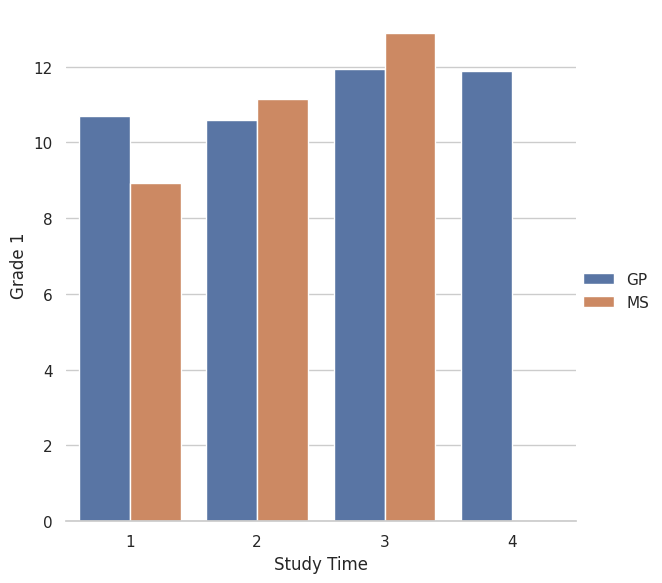

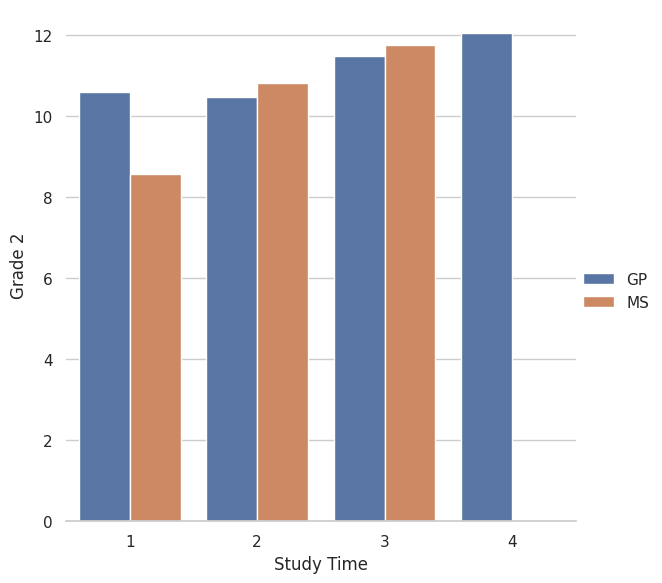

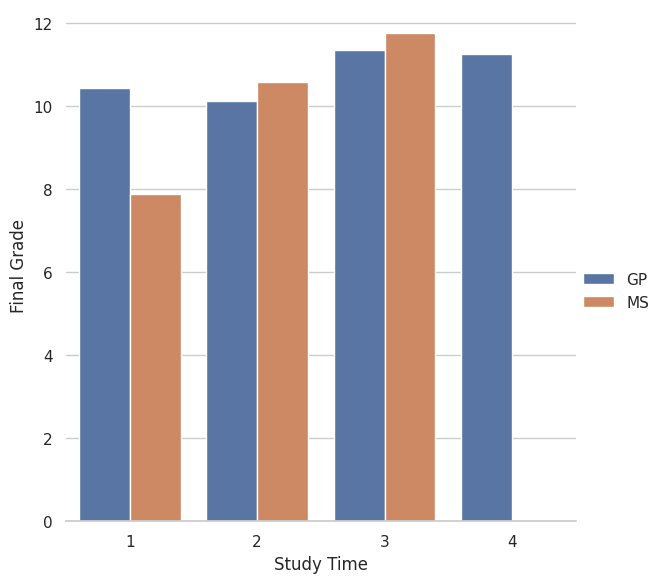

In [41]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="studytime", y="G1", hue="school",
    errorbar="sd", height=6, ci=None
)
g.despine(left=True)
g.set_axis_labels("Study Time", "Grade 1")
g.legend.set_title("")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="studytime", y="G2", hue="school",
    errorbar="sd", height=6, ci=None
)
g.despine(left=True)
g.set_axis_labels("Study Time", "Grade 2")
g.legend.set_title("")
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="studytime", y="G3", hue="school",
    errorbar="sd", height=6, ci=None
)
g.despine(left=True)
g.set_axis_labels("Study Time", "Final Grade")
g.legend.set_title("")

<ipython-input-42-9c90f3c78a16>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(custom_xtitles)
<ipython-input-42-9c90f3c78a16>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b2.set_xticklabels(custom_xtitles)
<ipython-input-42-9c90f3c78a16>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b3.set_xticklabels(custom_xtitles)


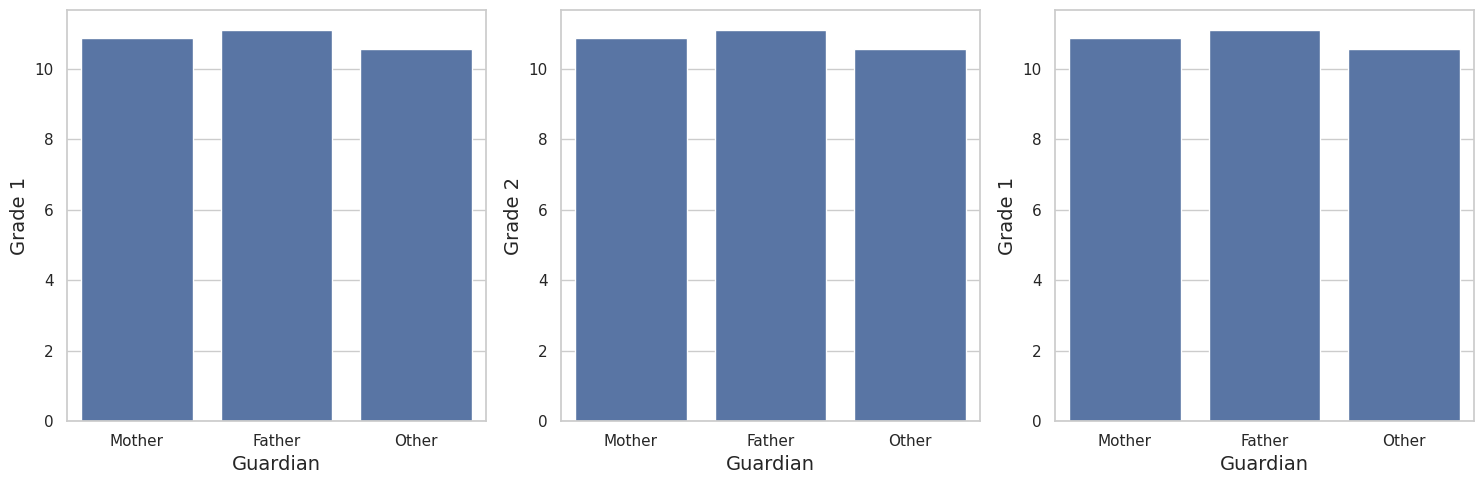

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first chart
b = sns.barplot(x=df['guardian'], y=df['G1'], data=df, ci=None, ax=axes[0])
b.set_xlabel('Guardian', fontsize=14)
b.set_ylabel('Grade 1', fontsize=14)
custom_xtitles = ["Mother", "Father", "Other"]  # Replace with your desired labels
b.set_xticklabels(custom_xtitles)
# Plot the second chart
b2 = sns.barplot(x=df['guardian'], y=df['G1'], data=df, ci=None, ax=axes[1])
b2.set_xlabel('Guardian', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(custom_xtitles)

# Plot the third chart
b3 = sns.barplot(x=df['guardian'], y=df['G1'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('Guardian', fontsize=14)
b3.set_ylabel('Grade 1', fontsize=14)
b3.set_xticklabels(custom_xtitles)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

<ipython-input-43-347e0f0baa43>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(custom_xtitles)
<ipython-input-43-347e0f0baa43>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b2.set_xticklabels(custom_xtitles)
<ipython-input-43-347e0f0baa43>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b3.set_xticklabels(custom_xtitles)


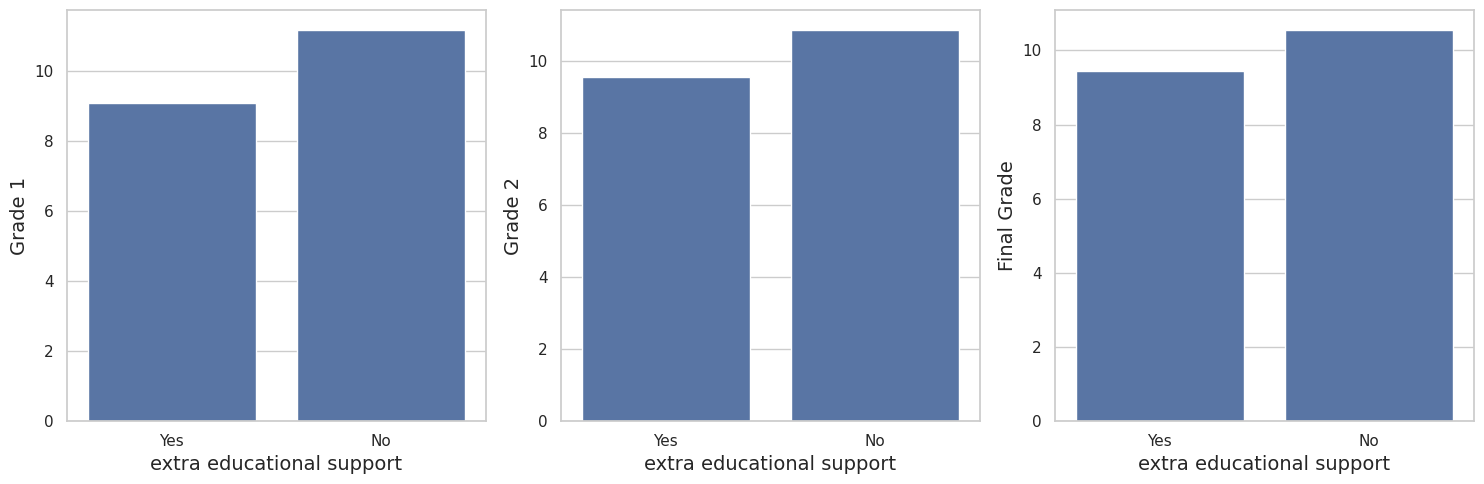

In [43]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first chart
b = sns.barplot(x=df['schoolsup'], y=df['G1'], data=df, ci=None, ax=axes[0])
b.set_xlabel('extra educational support', fontsize=14)
b.set_ylabel('Grade 1', fontsize=14)
custom_xtitles = ["Yes", "No"]  # Replace with your desired labels
b.set_xticklabels(custom_xtitles)

# Plot the second chart
b2 = sns.barplot(x=df['schoolsup'], y=df['G2'], data=df, ci=None, ax=axes[1])
b2.set_xlabel('extra educational support', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(custom_xtitles)
# Plot the third chart
b3 = sns.barplot(x=df['schoolsup'], y=df['G3'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('extra educational support', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(custom_xtitles)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

<ipython-input-44-2f5b016ed679>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(custom_xtitles)
<ipython-input-44-2f5b016ed679>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b1.set_xticklabels(custom_xtitles)
<ipython-input-44-2f5b016ed679>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b3.set_xticklabels(custom_xtitles)


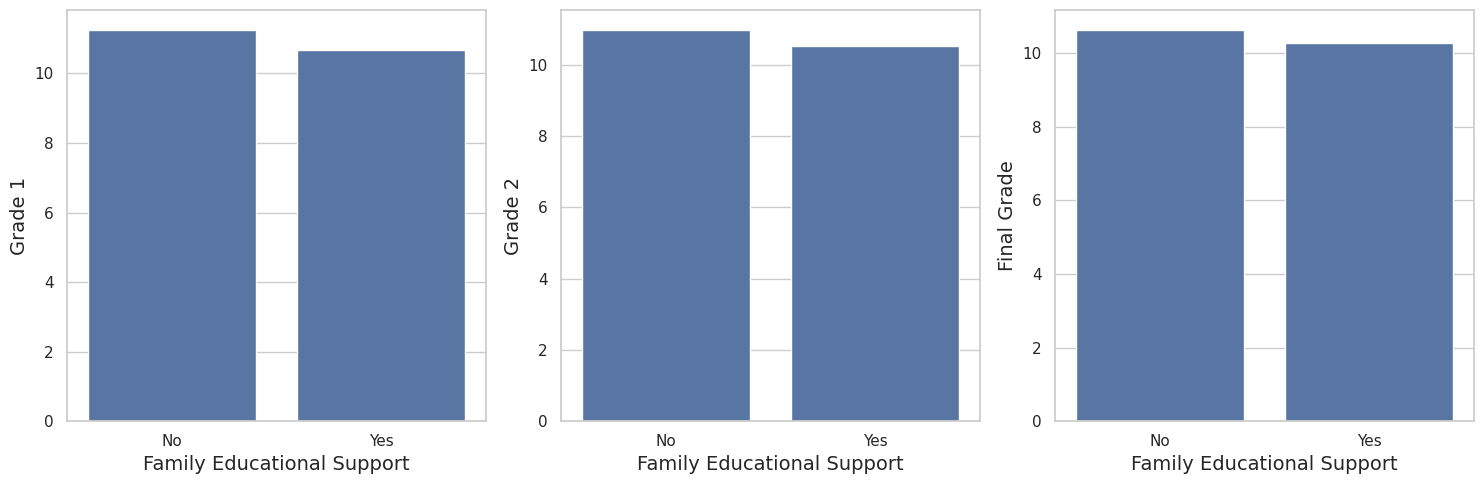

In [44]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first chart
b = sns.barplot(x=df['famsup'], y=df['G1'], data=df, ci=None, ax=axes[0])
b.set_xlabel('Family Educational Support', fontsize=14)
b.set_ylabel('Grade 1', fontsize=14)
custom_xtitles = ["No", "Yes"]  # Replace with your desired labels
b.set_xticklabels(custom_xtitles)

# Plot the second chart
b1 = sns.barplot(x=df['famsup'], y=df['G2'], data=df, ci=None, ax=axes[1])
b1.set_xlabel('Family Educational Support', fontsize=14)
b1.set_ylabel('Grade 2', fontsize=14)
b1.set_xticklabels(custom_xtitles)

# Plot the third chart
b3 = sns.barplot(x=df['famsup'], y=df['G3'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('Family Educational Support', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(custom_xtitles)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


<ipython-input-45-40412ad7f7b3>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(custom_xtitles, fontsize=12)
<ipython-input-45-40412ad7f7b3>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b1.set_xticklabels(custom_xtitles, fontsize=12)
<ipython-input-45-40412ad7f7b3>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b3.set_xticklabels(custom_xtitles, fontsize=12)


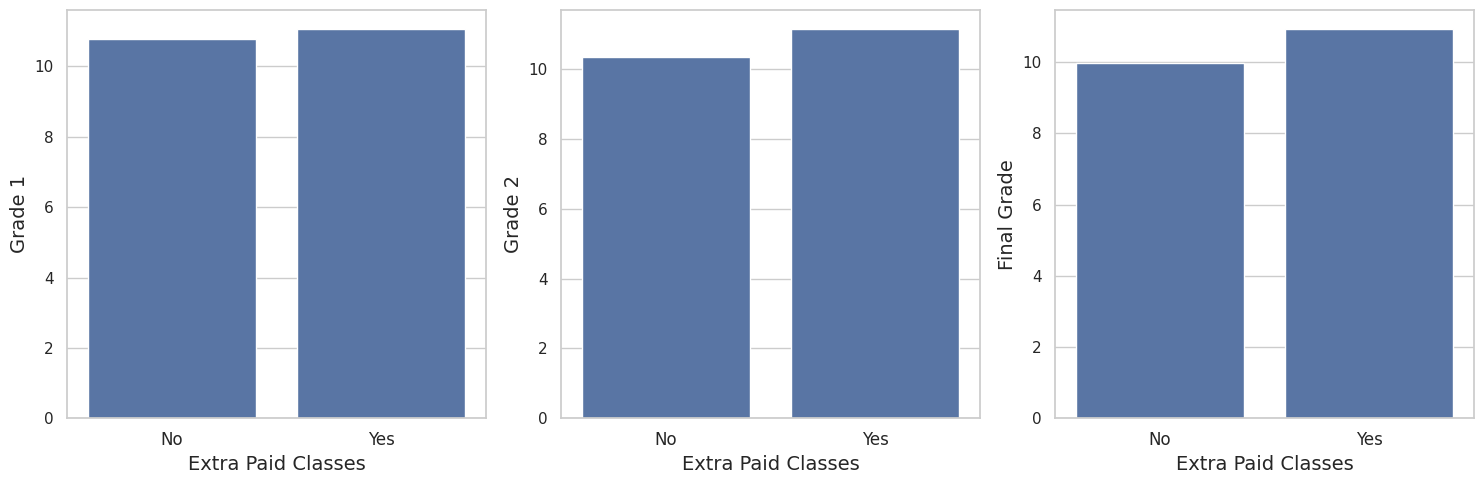

In [45]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first chart
b = sns.barplot(x=df['paid'], y=df['G1'], data=df, ci=None, ax=axes[0])
b.set_xlabel('Extra Paid Classes', fontsize=14)
b.set_ylabel('Grade 1', fontsize=14)
custom_xtitles = ["No", "Yes"]  # Replace with your desired labels
b.set_xticklabels(custom_xtitles, fontsize=12)

# Plot the second chart
b1 = sns.barplot(x=df['paid'], y=df['G2'], data=df, ci=None, ax=axes[1])
b1.set_xlabel('Extra Paid Classes', fontsize=14)
b1.set_ylabel('Grade 2', fontsize=14)
b1.set_xticklabels(custom_xtitles, fontsize=12)
# Plot the third chart
b3 = sns.barplot(x=df['paid'], y=df['G3'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('Extra Paid Classes', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(custom_xtitles, fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

<ipython-input-46-117fff543c92>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(custom_xtitles, fontsize=12)
<ipython-input-46-117fff543c92>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b1.set_xticklabels(custom_xtitles, fontsize=12)
<ipython-input-46-117fff543c92>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b3.set_xticklabels(custom_xtitles, fontsize=12)


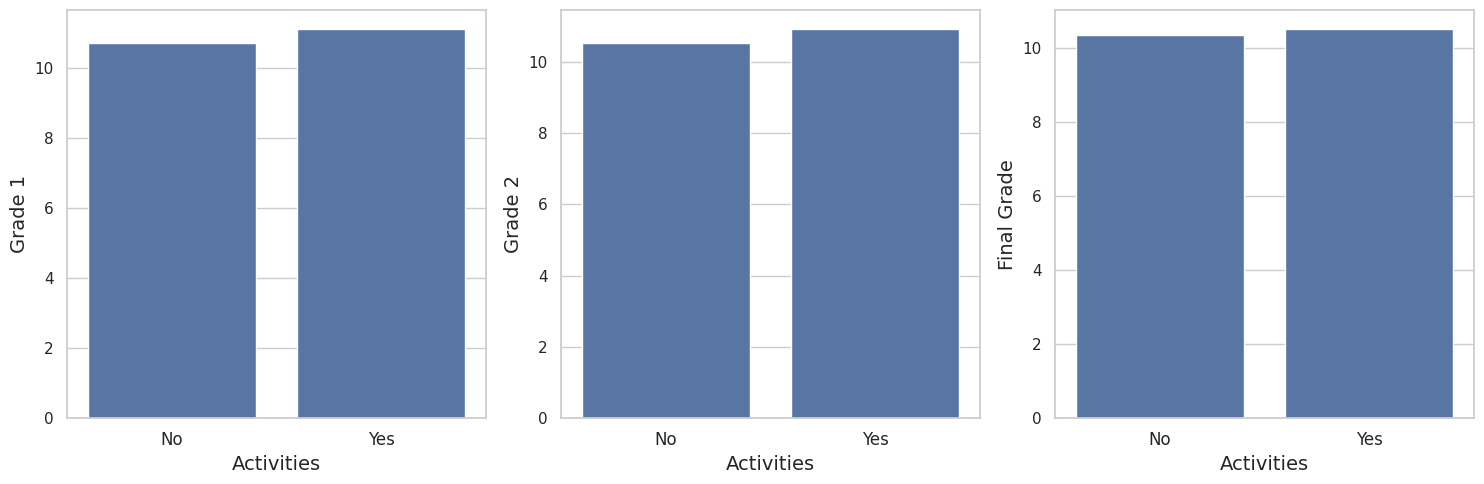

In [46]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first chart
b = sns.barplot(x=df['activities'], y=df['G1'], data=df, ci=None, ax=axes[0])
b.set_xlabel('Activities', fontsize=14)
b.set_ylabel('Grade 1', fontsize=14)
custom_xtitles = ["No", "Yes"]  # Replace with your desired labels
b.set_xticklabels(custom_xtitles, fontsize=12)
# Plot the second chart
b1 = sns.barplot(x=df['activities'], y=df['G2'], data=df, ci=None, ax=axes[1])
b1.set_xlabel('Activities', fontsize=14)
b1.set_ylabel('Grade 2', fontsize=14)
b1.set_xticklabels(custom_xtitles, fontsize=12)

# Plot the third chart
b3 = sns.barplot(x=df['activities'], y=df['G3'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('Activities', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(custom_xtitles, fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()
# Display the plots
plt.show()

<ipython-input-47-9fe35b86d2cb>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(custom_xtitles, fontsize=12)
<ipython-input-47-9fe35b86d2cb>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b1.set_xticklabels(custom_xtitles, fontsize=12)
<ipython-input-47-9fe35b86d2cb>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b2.set_xticklabels(custom_xtitles, fontsize=12)


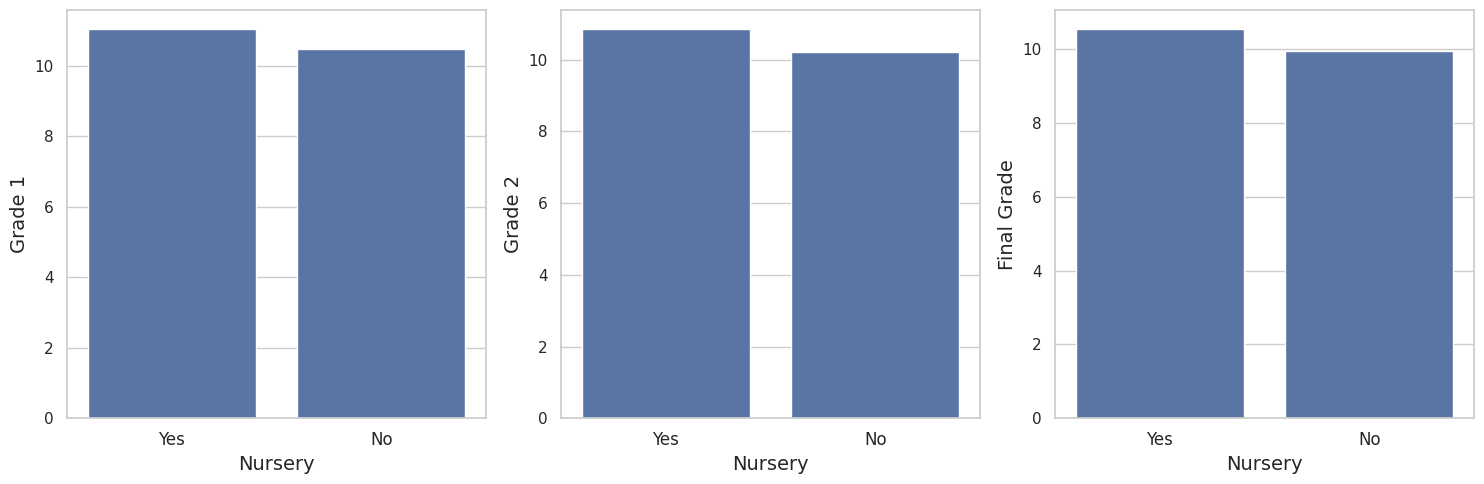

In [47]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first chart
b = sns.barplot(x='nursery', y='G1', data=df, ci=None, ax=axes[0])
b.set_xlabel('Nursery', fontsize=14)
b.set_ylabel('Grade 1', fontsize=14)
custom_xtitles = ["Yes", "No"]  # Replace with your desired labels
b.set_xticklabels(custom_xtitles, fontsize=12)

# Plot the second chart
b1 = sns.barplot(x='nursery', y='G2', data=df, ci=None, ax=axes[1])
b1.set_xlabel('Nursery', fontsize=14)
b1.set_ylabel('Grade 2', fontsize=14)
b1.set_xticklabels(custom_xtitles, fontsize=12)
# Plot the third chart
b2 = sns.barplot(x='nursery', y='G3', data=df, ci=None, ax=axes[2])
b2.set_xlabel('Nursery', fontsize=14)
b2.set_ylabel('Final Grade', fontsize=14)
b2.set_xticklabels(custom_xtitles, fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

<ipython-input-48-b80ed69e2e8b>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b1.set_xticklabels(custom_xtitles, fontsize=12)
<ipython-input-48-b80ed69e2e8b>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b2.set_xticklabels(custom_xtitles, fontsize=12)
<ipython-input-48-b80ed69e2e8b>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b3.set_xticklabels(custom_xtitles, fontsize=12)


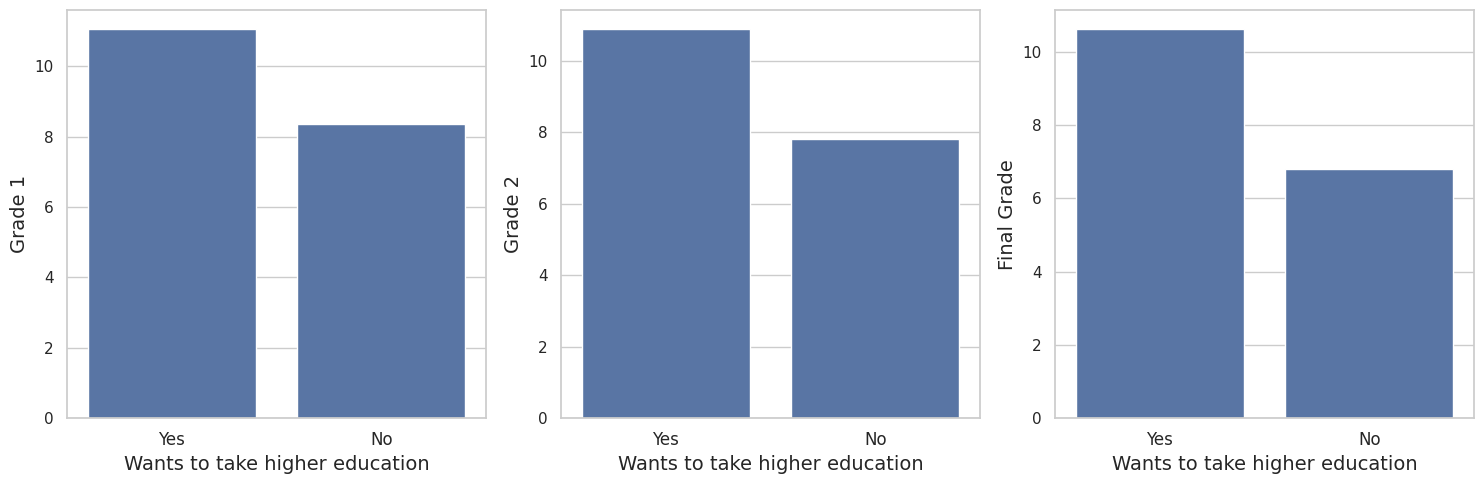

In [48]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Labels for 'higher' variable
custom_xtitles = ["Yes", "No"]

# Plot the first chart
b1 = sns.barplot(x=df['higher'], y=df['G1'], data=df, ci=None, ax=axes[0])
b1.set_xlabel('Wants to take higher education', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(custom_xtitles, fontsize=12)
# Plot the second chart
b2 = sns.barplot(x=df['higher'], y=df['G2'], data=df, ci=None, ax=axes[1])
b2.set_xlabel('Wants to take higher education', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(custom_xtitles, fontsize=12)

# Plot the third chart
b3 = sns.barplot(x=df['higher'], y=df['G3'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('Wants to take higher education', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(custom_xtitles, fontsize=12)
# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

<ipython-input-49-d1dd1360ae01>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b1.set_xticklabels(custom_xtitles, fontsize=12)
<ipython-input-49-d1dd1360ae01>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b2.set_xticklabels(custom_xtitles, fontsize=12)
<ipython-input-49-d1dd1360ae01>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b3.set_xticklabels(custom_xtitles, fontsize=12)


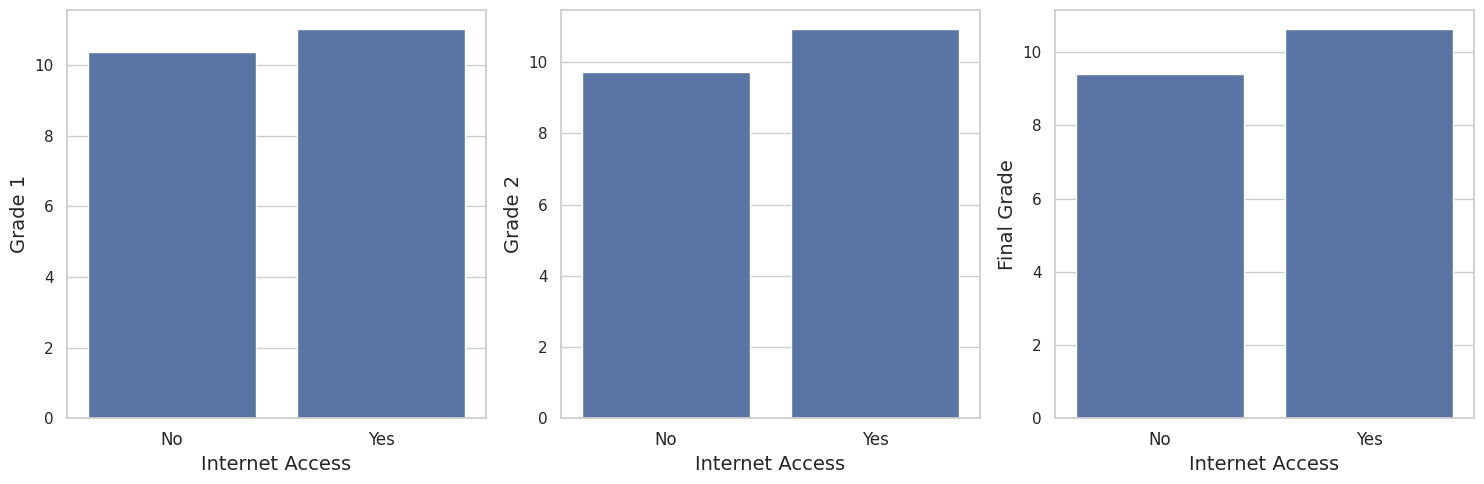

In [49]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Labels for 'internet' variable
custom_xtitles = ["No", "Yes"]

# Plot the first chart
b1 = sns.barplot(x=df['internet'], y=df['G1'], data=df, ci=None, ax=axes[0])
b1.set_xlabel('Internet Access', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(custom_xtitles, fontsize=12)
# Plot the second chart
b2 = sns.barplot(x=df['internet'], y=df['G2'], data=df, ci=None, ax=axes[1])
b2.set_xlabel('Internet Access', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(custom_xtitles, fontsize=12)

# Plot the third chart
b3 = sns.barplot(x=df['internet'], y=df['G3'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('Internet Access', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(custom_xtitles, fontsize=12)
# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

<ipython-input-50-99be54840c1b>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b1.set_xticklabels(custom_xtitles, fontsize=12)
<ipython-input-50-99be54840c1b>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b2.set_xticklabels(custom_xtitles, fontsize=12)
<ipython-input-50-99be54840c1b>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b3.set_xticklabels(custom_xtitles, fontsize=12)


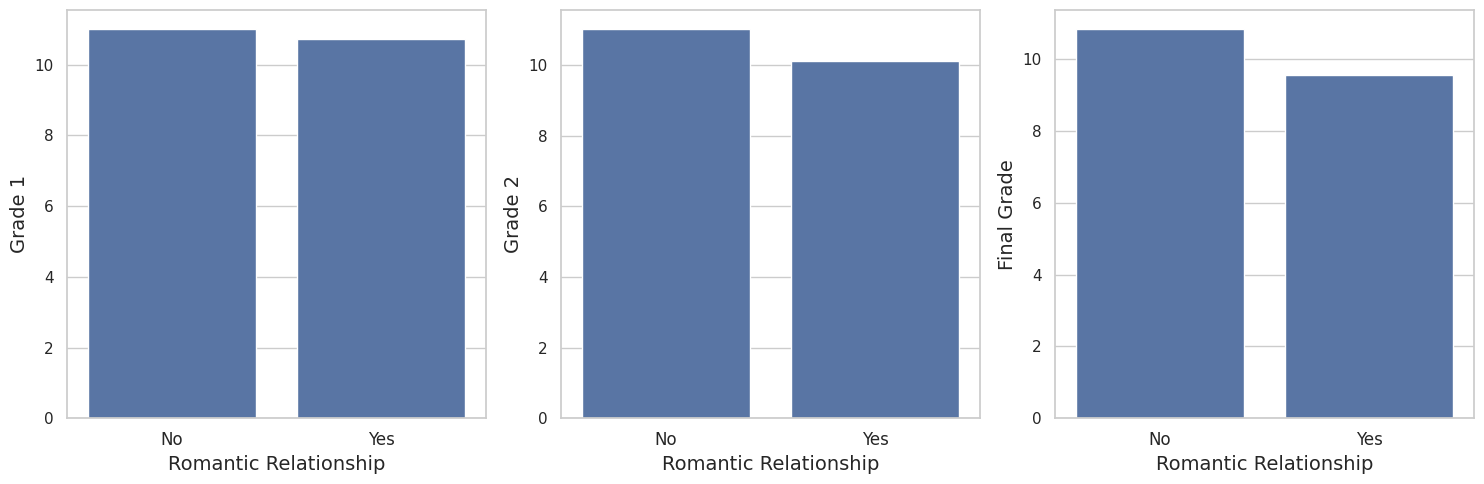

In [50]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Labels for 'romantic' variable
custom_xtitles = ["No", "Yes"]

# Plot the first chart
b1 = sns.barplot(x=df['romantic'], y=df['G1'], data=df, ci=None, ax=axes[0])
b1.set_xlabel('Romantic Relationship', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(custom_xtitles, fontsize=12)
# Plot the second chart
b2 = sns.barplot(x=df['romantic'], y=df['G2'], data=df, ci=None, ax=axes[1])
b2.set_xlabel('Romantic Relationship', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(custom_xtitles, fontsize=12)

# Plot the third chart
b3 = sns.barplot(x=df['romantic'], y=df['G3'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('Romantic Relationship', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(custom_xtitles, fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()
# Display the plots
plt.show()

In [69]:
df_encoded = df.copy()

In [70]:
for col in df_encoded.select_dtypes(include=["object"]).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

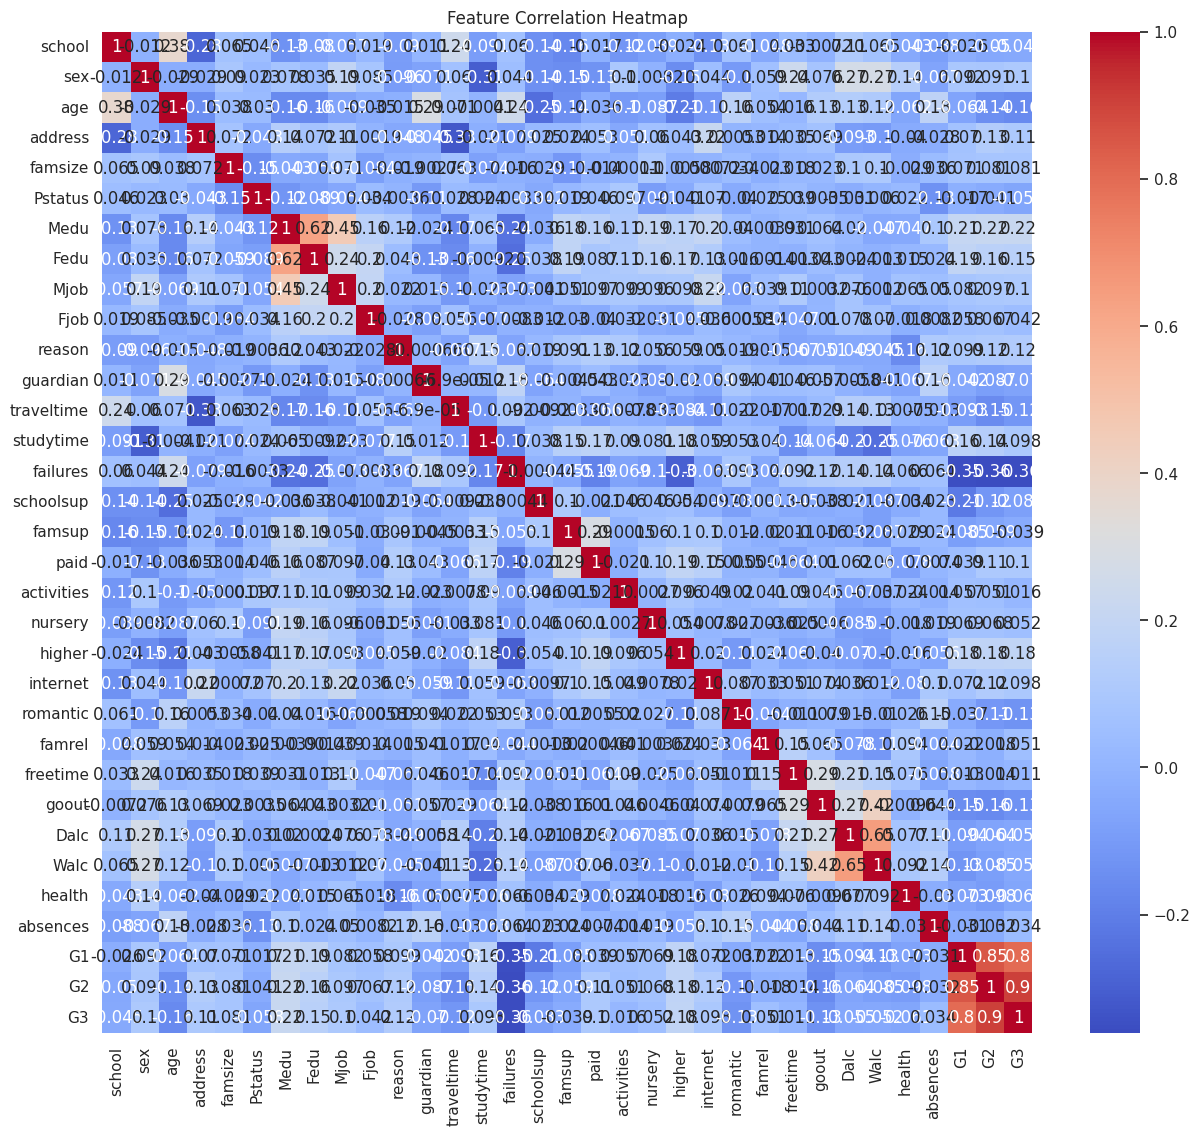

In [71]:
plt.figure(figsize=(15, 13))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

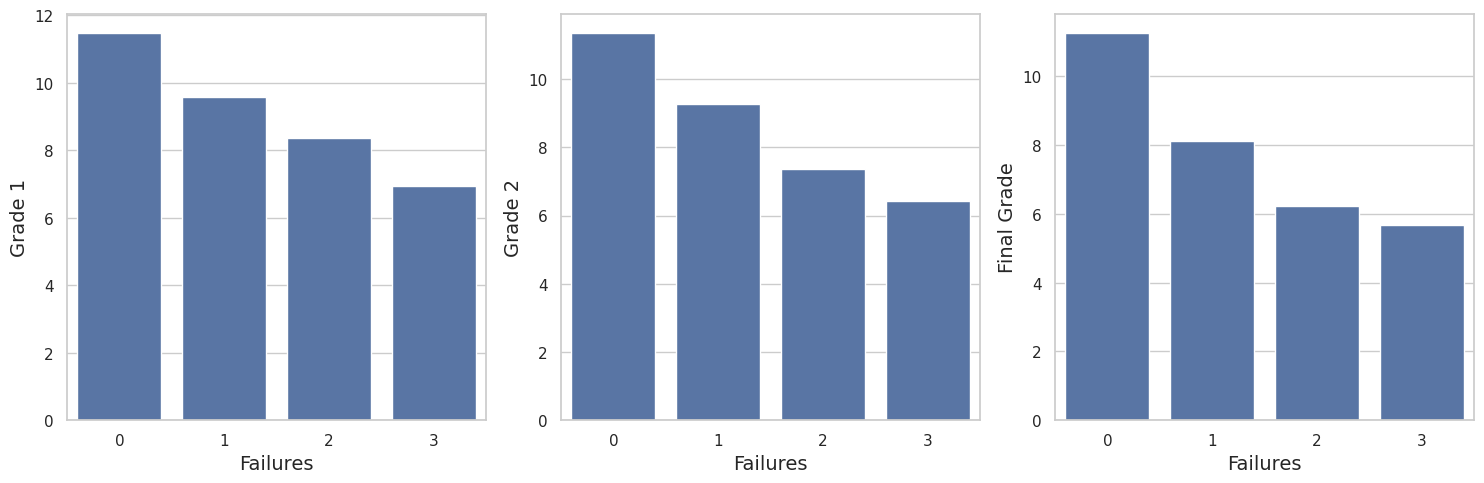

In [72]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first chart for 'G1'
b1 = sns.barplot(x=df['failures'], y=df['G1'], data=df, ci=None, ax=axes[0])
b1.set_xlabel('Failures', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)

# Plot the second chart for 'G2'
b2 = sns.barplot(x=df['failures'], y=df['G2'], data=df, ci=None, ax=axes[1])
b2.set_xlabel('Failures', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
# Plot the third chart for 'G3'
b3 = sns.barplot(x=df['failures'], y=df['G3'], data=df, ci=None, ax=axes[2])
b3.set_xlabel('Failures', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

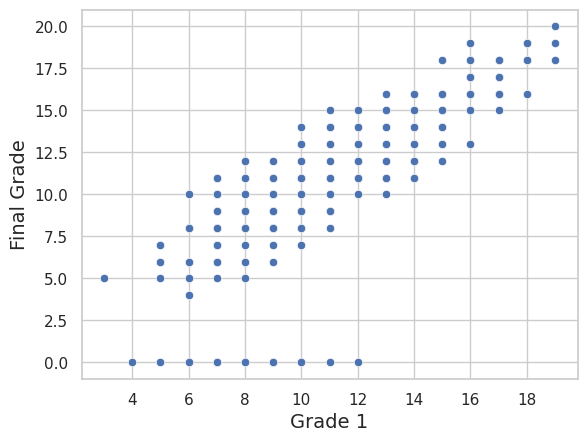

In [73]:
b= sns.scatterplot(x=df['G1'],y=df['G3'],data=df)
b.set_xlabel('Grade 1', fontsize = 14)
b.set_ylabel('Final Grade', fontsize = 14)
plt.show()

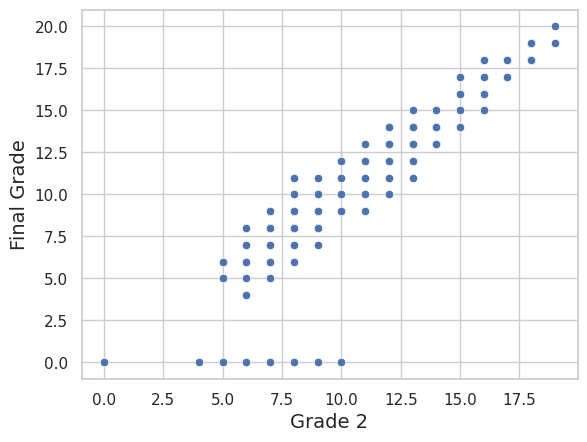

In [74]:
b= sns.scatterplot(x=df['G2'],y=df['G3'],data=df)
b.set_xlabel('Grade 2', fontsize = 14)
b.set_ylabel('Final Grade', fontsize = 14)
plt.show()

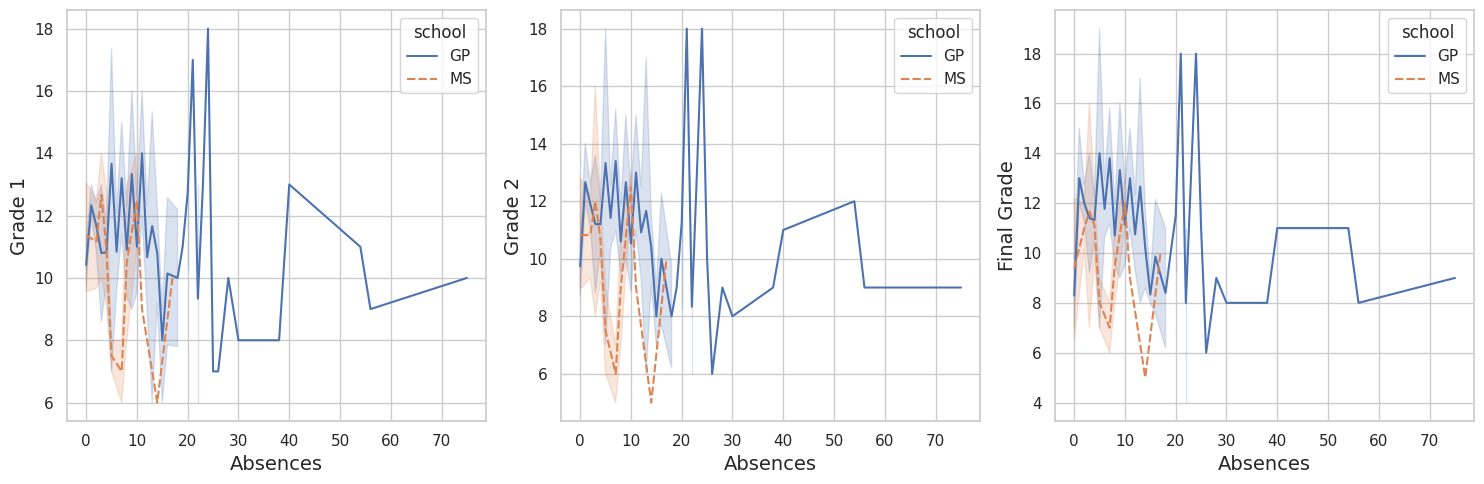

In [75]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first chart for 'G1'
b1 = sns.lineplot(x='absences', y='G1', hue='school', style='school', data=df, ax=axes[0])
b1.set_xlabel('Absences', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)

# Plot the second chart for 'G2'
b2 = sns.lineplot(x='absences', y='G2', hue='school', style='school', data=df, ax=axes[1])
b2.set_xlabel('Absences', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
# Plot the third chart for 'G3'
b3 = sns.lineplot(x='absences', y='G3', hue='school', style='school', data=df, ax=axes[2])
b3.set_xlabel('Absences', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [76]:
df.drop(df[df['G3'] < 1].index, inplace = True)

In [77]:
df_ohe = pd.get_dummies(df, drop_first=True)

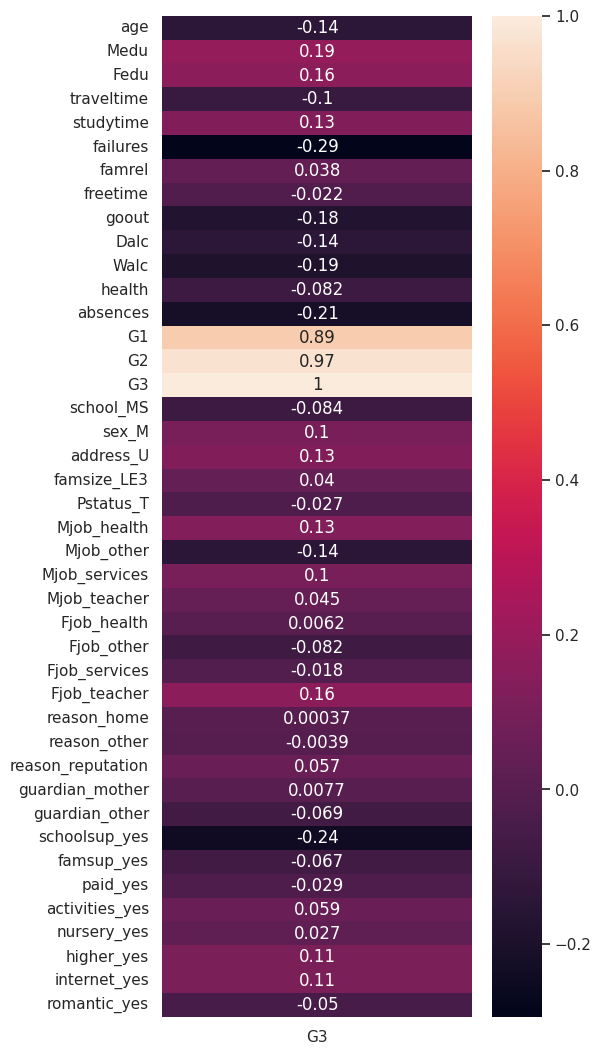

In [78]:
# Calculate the correlation matrix for all columns
correlation_matrix = df_ohe.corr()

# Extract the correlation values for the 'G3' column
correlation_with_G3 = correlation_matrix['G3']

# Create a heatmap of the correlation values
plt.figure(figsize=(5, 13))
sns.heatmap(correlation_with_G3.to_frame(), annot=True, cbar=True)
plt.show()

<ipython-input-79-cd08e9f09d81>:30: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


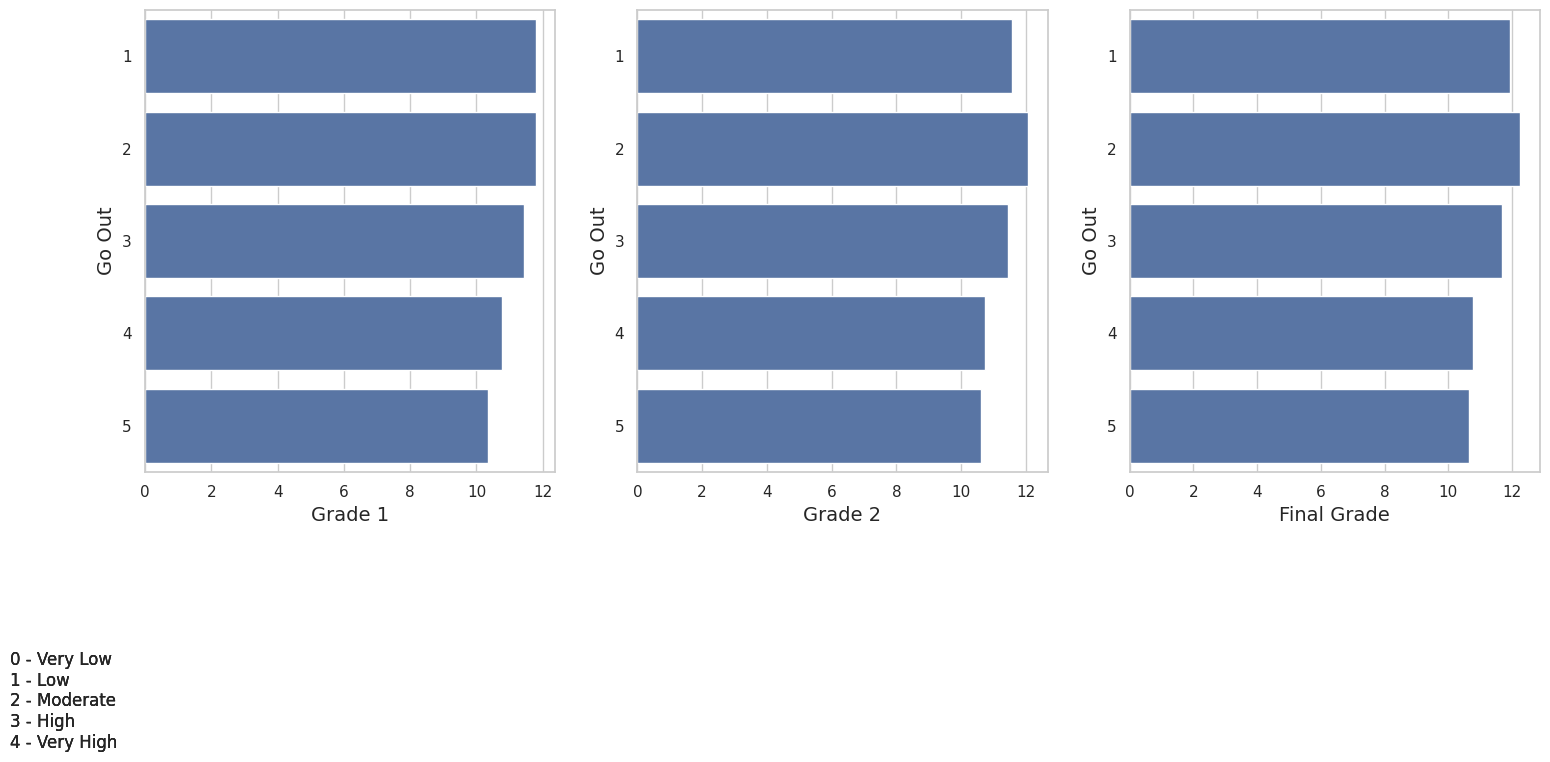

In [79]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
bars = [
    "0 - Very Low",
    "1 - Low",
    "2 - Moderate",
    "3 - High",
    "4 - Very High"
]


# Create the first horizontal bar plot
b1 = sns.barplot(x='G1', y='goout', data=df_ohe, ci=None, ax=axs[0], orient='h')
b1.set_ylabel('Go Out', fontsize=14)
b1.set_xlabel('Grade 1', fontsize=14)
b1.text(0.05, -0.35, '\n'.join(bars), fontsize=12, transform=plt.gcf().transFigure)
# Create the second horizontal bar plot
b2 = sns.barplot(x=df['G2'], y=df['goout'], data=df, ci=None, ax=axs[1], orient='h')
b2.set_ylabel('Go Out', fontsize=14)
b2.set_xlabel('Grade 2', fontsize=14)
b2.text(0.05, -0.35, '\n'.join(bars), fontsize=12, transform=plt.gcf().transFigure)


# Create the third horizontal bar plot
b3 = sns.barplot(x='G3', y='goout', data=df_ohe, ci=None, ax=axs[2], orient='h')
b3.set_ylabel('Go Out', fontsize=14)
b3.set_xlabel('Final Grade', fontsize=14)
b3.text(0.05, -0.35, '\n'.join(bars), fontsize=12, transform=plt.gcf().transFigure)
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<ipython-input-80-2d29f9d17edd>:30: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


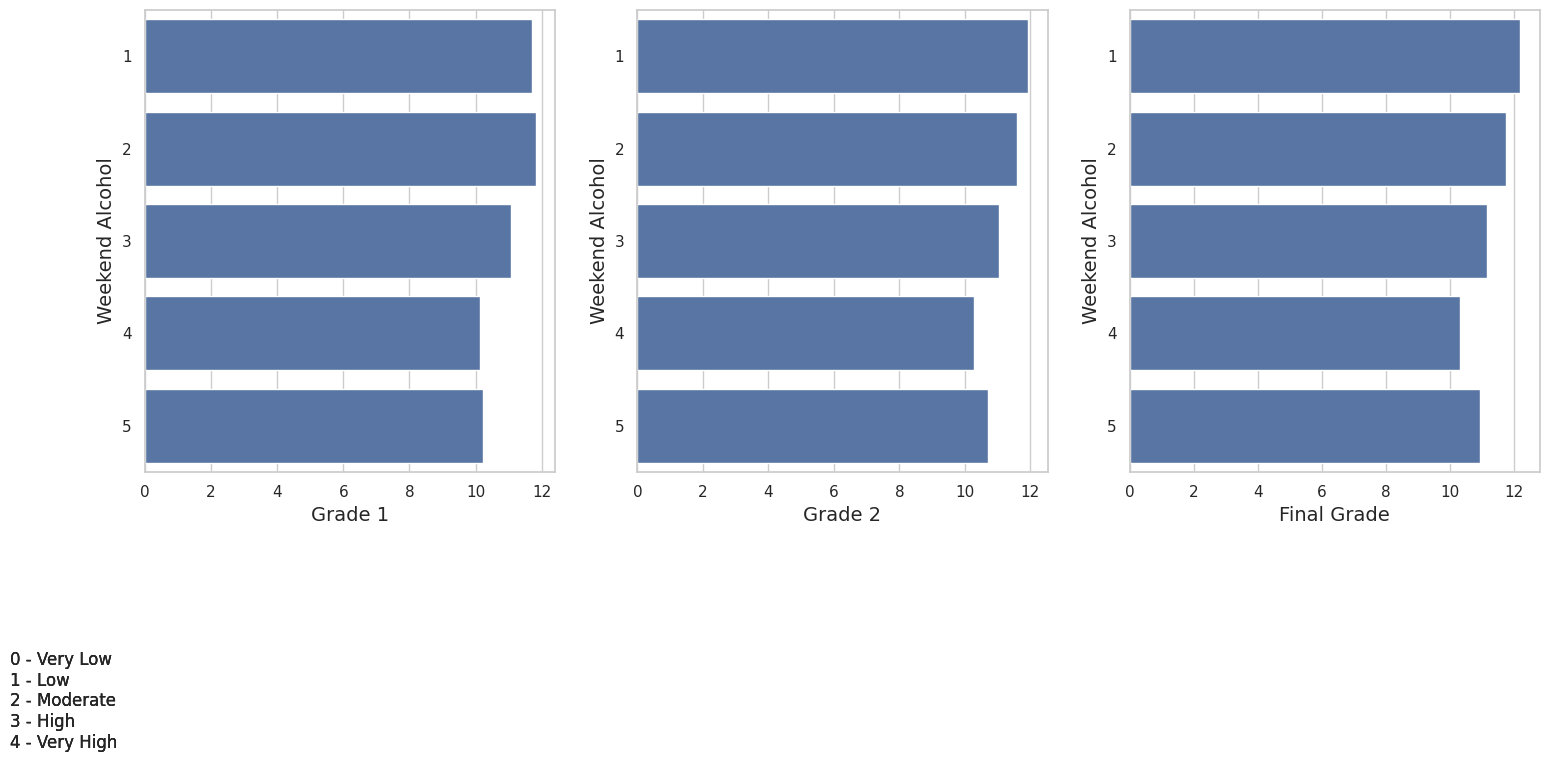

In [80]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
bars = [
    "0 - Very Low",
    "1 - Low",
    "2 - Moderate",
    "3 - High",
    "4 - Very High"
]


# Create the first horizontal bar plot
b1 = sns.barplot(x='G1', y='Walc', data=df_ohe, ci=None, ax=axs[0], orient='h')
b1.set_ylabel('Weekend Alcohol', fontsize=14)
b1.set_xlabel('Grade 1', fontsize=14)
b1.text(0.05, -0.35, '\n'.join(bars), fontsize=12, transform=plt.gcf().transFigure)
# Create the second horizontal bar plot
b2 = sns.barplot(x='G2', y='Walc', data=df_ohe, ci=None, ax=axs[1], orient='h')
b2.set_ylabel('Weekend Alcohol', fontsize=14)
b2.set_xlabel('Grade 2', fontsize=14)
b2.text(0.05, -0.35, '\n'.join(bars), fontsize=12, transform=plt.gcf().transFigure)


# Create the third horizontal bar plot
b3 = sns.barplot(x='G3', y='Walc', data=df_ohe, ci=None, ax=axs[2], orient='h')
b3.set_ylabel('Weekend Alcohol', fontsize=14)
b3.set_xlabel('Final Grade', fontsize=14)
b3.text(0.05, -0.35, '\n'.join(bars), fontsize=12, transform=plt.gcf().transFigure)
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<ipython-input-81-77f22d31ccca>:30: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


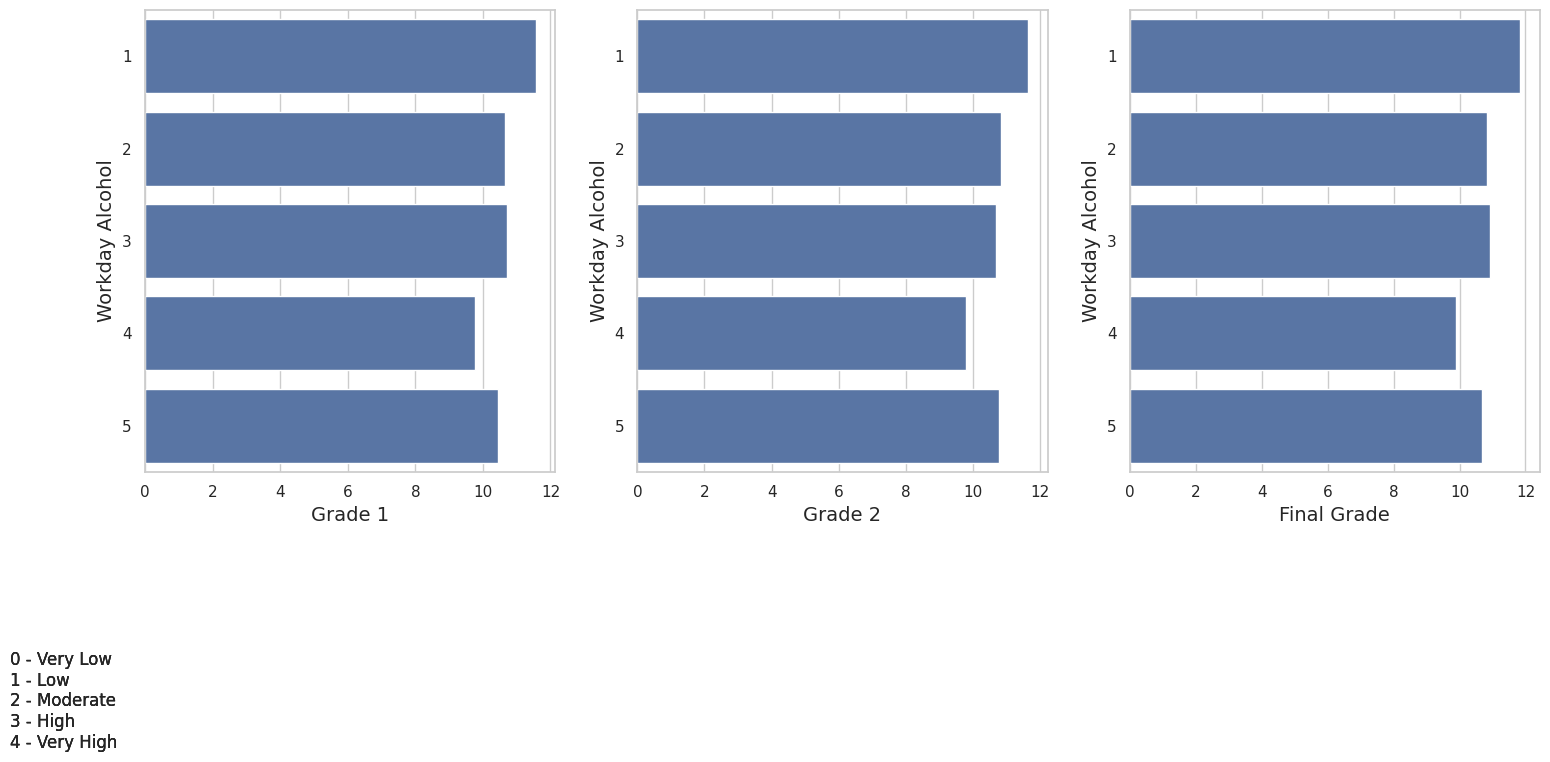

In [81]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
bars = [
    "0 - Very Low",
    "1 - Low",
    "2 - Moderate",
    "3 - High",
    "4 - Very High"
]


# Create the first horizontal bar plot
b1 = sns.barplot(x='G1', y='Dalc', data=df_ohe, ci=None, ax=axs[0], orient='h')
b1.set_ylabel('Workday Alcohol', fontsize=14)
b1.set_xlabel('Grade 1', fontsize=14)
b1.text(0.05, -0.35, '\n'.join(bars), fontsize=12, transform=plt.gcf().transFigure)
# Create the second horizontal bar plot
b2 = sns.barplot(x='G2', y='Dalc', data=df_ohe, ci=None, ax=axs[1], orient='h')
b2.set_ylabel('Workday Alcohol', fontsize=14)
b2.set_xlabel('Grade 2', fontsize=14)
b2.text(0.05, -0.35, '\n'.join(bars), fontsize=12, transform=plt.gcf().transFigure)


# Create the third horizontal bar plot
b3 = sns.barplot(x='G3', y='Dalc', data=df_ohe, ci=None, ax=axs[2], orient='h')
b3.set_ylabel('Workday Alcohol', fontsize=14)
b3.set_xlabel('Final Grade', fontsize=14)
b3.text(0.05, -0.35, '\n'.join(bars), fontsize=12, transform=plt.gcf().transFigure)
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [82]:
THRESHOLD = 0.13

In [83]:
G3_corr = df_ohe.corr()["G3"]

In [84]:
df_ohe_after_drop_features = df_ohe.copy()

In [88]:
for key, value in G3_corr.items():  # Use .items() instead of .iteritems()
    if abs(value) < THRESHOLD:
        df_ohe_after_drop_features.drop(columns=key, inplace=True)


In [89]:
df_ohe_after_drop_features.drop(columns=["age"], axis=1, inplace=True)

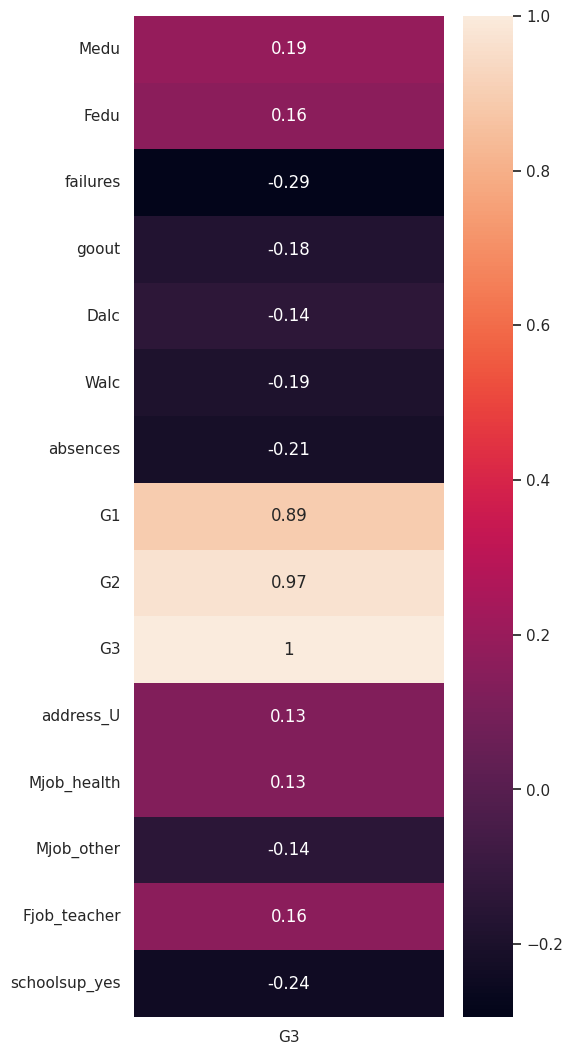

In [90]:
# Calculate the correlation matrix for all columns
correlation_matrix = df_ohe_after_drop_features.corr()

# Extract the correlation values for the 'G3' column
correlation_with_G3 = correlation_matrix['G3']

# Create a heatmap of the correlation values
plt.figure(figsize=(5, 13))
sns.heatmap(correlation_with_G3.to_frame(), annot=True, cbar=True)
plt.show()

In [91]:
X = df_ohe_after_drop_features.drop('G3',axis = 1)
y = df_ohe_after_drop_features['G3']

In [92]:
df_ohe_after_drop_features.head()

Medu  Fedu  failures  goout  Dalc  Walc  absences  G1  G2  G3  address_U  \
0     4     4         0      4     1     1         6   5   6   6       True   
1     1     1         0      3     1     1         4   5   5   6       True   
2     1     1         3      2     2     3        10   7   8  10       True   
3     4     2         0      2     1     1         2  15  14  15       True   
4     3     3         0      2     1     2         4   6  10  10       True   

   Mjob_health  Mjob_other  Fjob_teacher  schoolsup_yes  
0        False       False          True           True  
1        False       False         False          False  
2        False       False         False           True  
3         True       False         False          False  
4        False        True         False          False

In [93]:
X_all_features_except_G3 = df_ohe.drop('G3',axis = 1)
y_G3 = df_ohe ['G3']

In [95]:
def train_regression_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

    model1 = LinearRegression()
    model2 = BayesianRidge()
    model3 = RandomForestRegressor()
    model4 = GradientBoostingRegressor()
    model5 = DecisionTreeRegressor()
    model6 = Ridge()
    model7 = Lasso()

    models = [model1, model2, model3, model4, model5, model6, model7 ]
    model_name_list = ['LinearRegression', 'BayesianRidge', 'RandomForestRegressor', 'GradientBoostingRegressor',
           'DecisionTreeRegressor', 'Ridge', 'Lasso']

    # Dataframe for results
    results = pd.DataFrame(columns=['MAE', 'RMSE', 'RMSE by cross validation', 'MSE', 'R^2'], index=model_name_list)
    for i, model in enumerate(models):
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_test_pred = model.predict(X_test)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_test_pred)
        mae = mean_absolute_error(y_test, y_test_pred)
        rmse = np.sqrt(mse)
        r_squared = r2_score(y_test, y_test_pred)

       # Cross-validation
        scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=5)
        rmse_cross_val = np.sqrt(-scores.mean())

        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse, rmse_cross_val ,mse,r_squared ]

    return results

In [96]:
train_regression_model(X, y)

MAE      RMSE RMSE by cross validation  \
LinearRegression           0.485933  0.715841                 1.072476   
BayesianRidge                0.4842  0.711592                 0.836028   
RandomForestRegressor      0.618611  0.915425                 1.170377   
GradientBoostingRegressor  0.637744  0.872188                 1.181309   
DecisionTreeRegressor      0.805556  1.118034                 1.172604   
Ridge                      0.485829  0.715395                 0.890409   
Lasso                      0.559807  0.771662                  0.88177   

                                MSE       R^2  
LinearRegression           0.512429  0.947704  
BayesianRidge              0.506363  0.948323  
RandomForestRegressor      0.838003  0.914477  
GradientBoostingRegressor  0.760712  0.922365  
DecisionTreeRegressor          1.25  0.872431  
Ridge                       0.51179  0.947769  
Lasso                      0.595462   0.93923

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

best_model1 = BayesianRidge()
best_model1.fit(X_train, y_train)

y_test_pred = best_model1.predict(X_test)

Text(0, 0.5, 'Predicted')

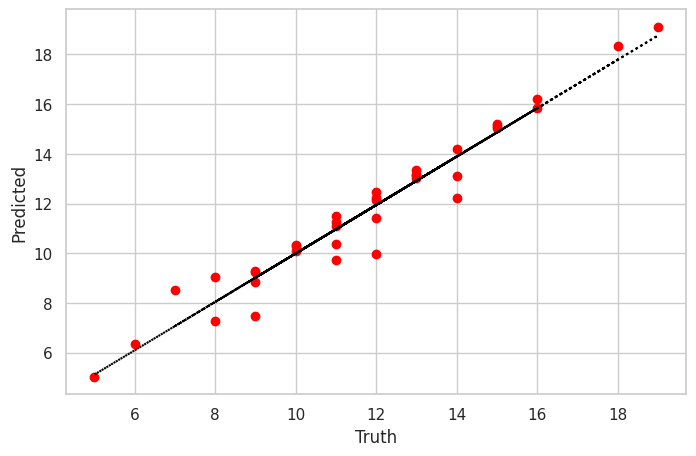

In [98]:
n,m=polyfit(y_test, y_test_pred, 1)
plt.figure(figsize=(8,5))
plt.scatter(x = y_test, y = y_test_pred, c="red")
plt.plot(y_test,  m*(y_test) + n   ,':', c="black")

plt.xlabel("Truth")
plt.ylabel("Predicted")

In [99]:
with open('reg_model.pkl', 'wb') as file:
    pickle.dump(best_model1, file)

In [100]:
train_regression_model(X_all_features_except_G3, y_G3)

MAE      RMSE RMSE by cross validation  \
LinearRegression           0.577762   0.84658                 1.004494   
BayesianRidge              0.532743  0.766342                 0.704171   
RandomForestRegressor      0.539722  0.786142                 1.192617   
GradientBoostingRegressor  0.665242  0.893368                 1.124536   
DecisionTreeRegressor      0.638889  1.013794                 1.518928   
Ridge                      0.572632  0.837592                 0.721258   
Lasso                      0.559807  0.771662                 0.881765   

                                MSE       R^2  
LinearRegression           0.716697  0.926857  
BayesianRidge               0.58728  0.940065  
RandomForestRegressor      0.618019  0.936928  
GradientBoostingRegressor  0.798107  0.918549  
DecisionTreeRegressor      1.027778   0.89511  
Ridge                       0.70156  0.928402  
Lasso                      0.595462   0.93923

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_all_features_except_G3, y_G3, test_size=0.1, shuffle=True, random_state=42)

best_model2 = BayesianRidge()
best_model2.fit(X_train, y_train)

y_test_pred2 = best_model2.predict(X_test)

Text(0, 0.5, 'Predicted')

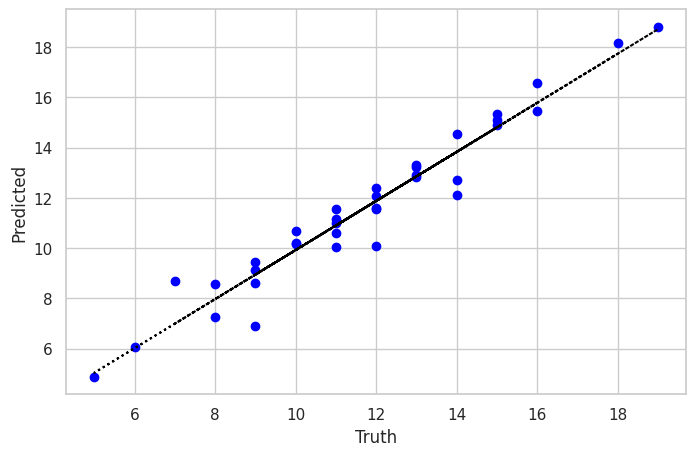

In [102]:
n,m=polyfit(y_test,y_test_pred2,1)
plt.figure(figsize=(8,5))
plt.scatter(x = y_test, y = y_test_pred2, c="blue")
plt.plot(y_test,  m*(y_test) + n   ,':', c="black")
plt.xlabel("Truth")
plt.ylabel("Predicted")

In [103]:
X = df_ohe_after_drop_features.drop('G3',axis = 1)
y = df_ohe_after_drop_features['G3'].apply(lambda x: 'pass' if x >= 10 else 'fail')

In [105]:
def train_binary_classification_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

    model1 = LogisticRegression()
    model2 = MultinomialNB()
    model3 = BaggingClassifier()
    model4 = DecisionTreeClassifier()
    model5 = LinearSVC()
    model6 = SGDClassifier()
    model7 = KNeighborsClassifier()
    model8 = RandomForestClassifier()
    model9 = GradientBoostingClassifier()

    models = [model1, model2, model3, model4, model5, model6, model7, model8, model9 ]
    model_name_list = ['LogisticRegression', 'MultinomialNB', 'BaggingClassifier', 'DecisionTreeClassifier',
           'LinearSVC', 'SGDClassifier', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']
            # Dataframe for results
    results = pd.DataFrame(columns=["Test Accuracy", "Train Accuracy"], index=model_name_list)

    for i, model in enumerate(models):
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

       # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_test_pred)
        accuracy_train = accuracy_score(y_train, y_train_pred)



        model_name = model_name_list[i]
        results.loc[model_name, :] = [accuracy, accuracy_train ]

    return results

In [106]:
train_binary_classification_model(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy Train Accuracy
LogisticRegression              0.944444       0.922118
MultinomialNB                       0.75       0.775701
BaggingClassifier               0.972222       0.987539
DecisionTreeClassifier          0.972222            1.0
LinearSVC                       0.944444       0.925234
SGDClassifier                   0.888889       0.844237
KNeighborsClassifier            0.944444       0.919003
RandomForestClassifier               1.0            1.0
GradientBoostingClassifier      0.972222       0.996885

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

y_test_pred_gb = gb_model.predict(X_test)

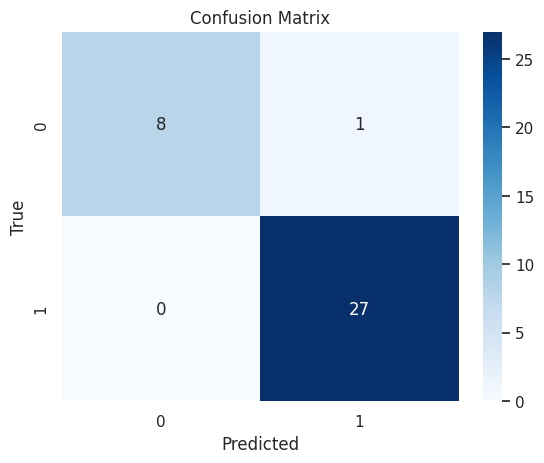

In [108]:
cm = confusion_matrix(y_test, y_test_pred_gb)

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [109]:
bagg_model = BaggingClassifier()
bagg_model.fit(X_train, y_train)

y_test_pred_bgg = bagg_model.predict(X_test)

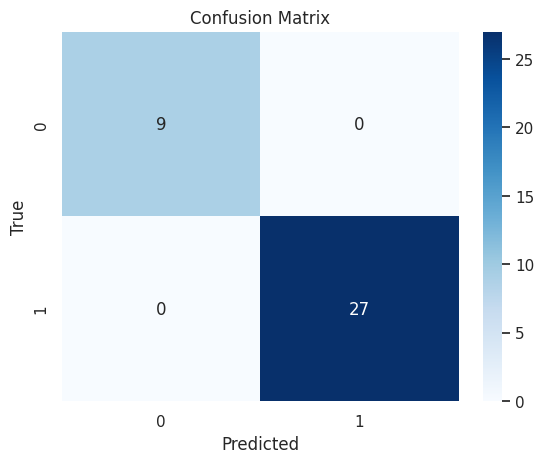

In [110]:
cm2 = confusion_matrix(y_test, y_test_pred_bgg)

# Plot confusion matrix as a heatmap
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [111]:
with open('binay_classification_model.pkl', 'wb') as file:
    pickle.dump(gb_model, file)

In [112]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

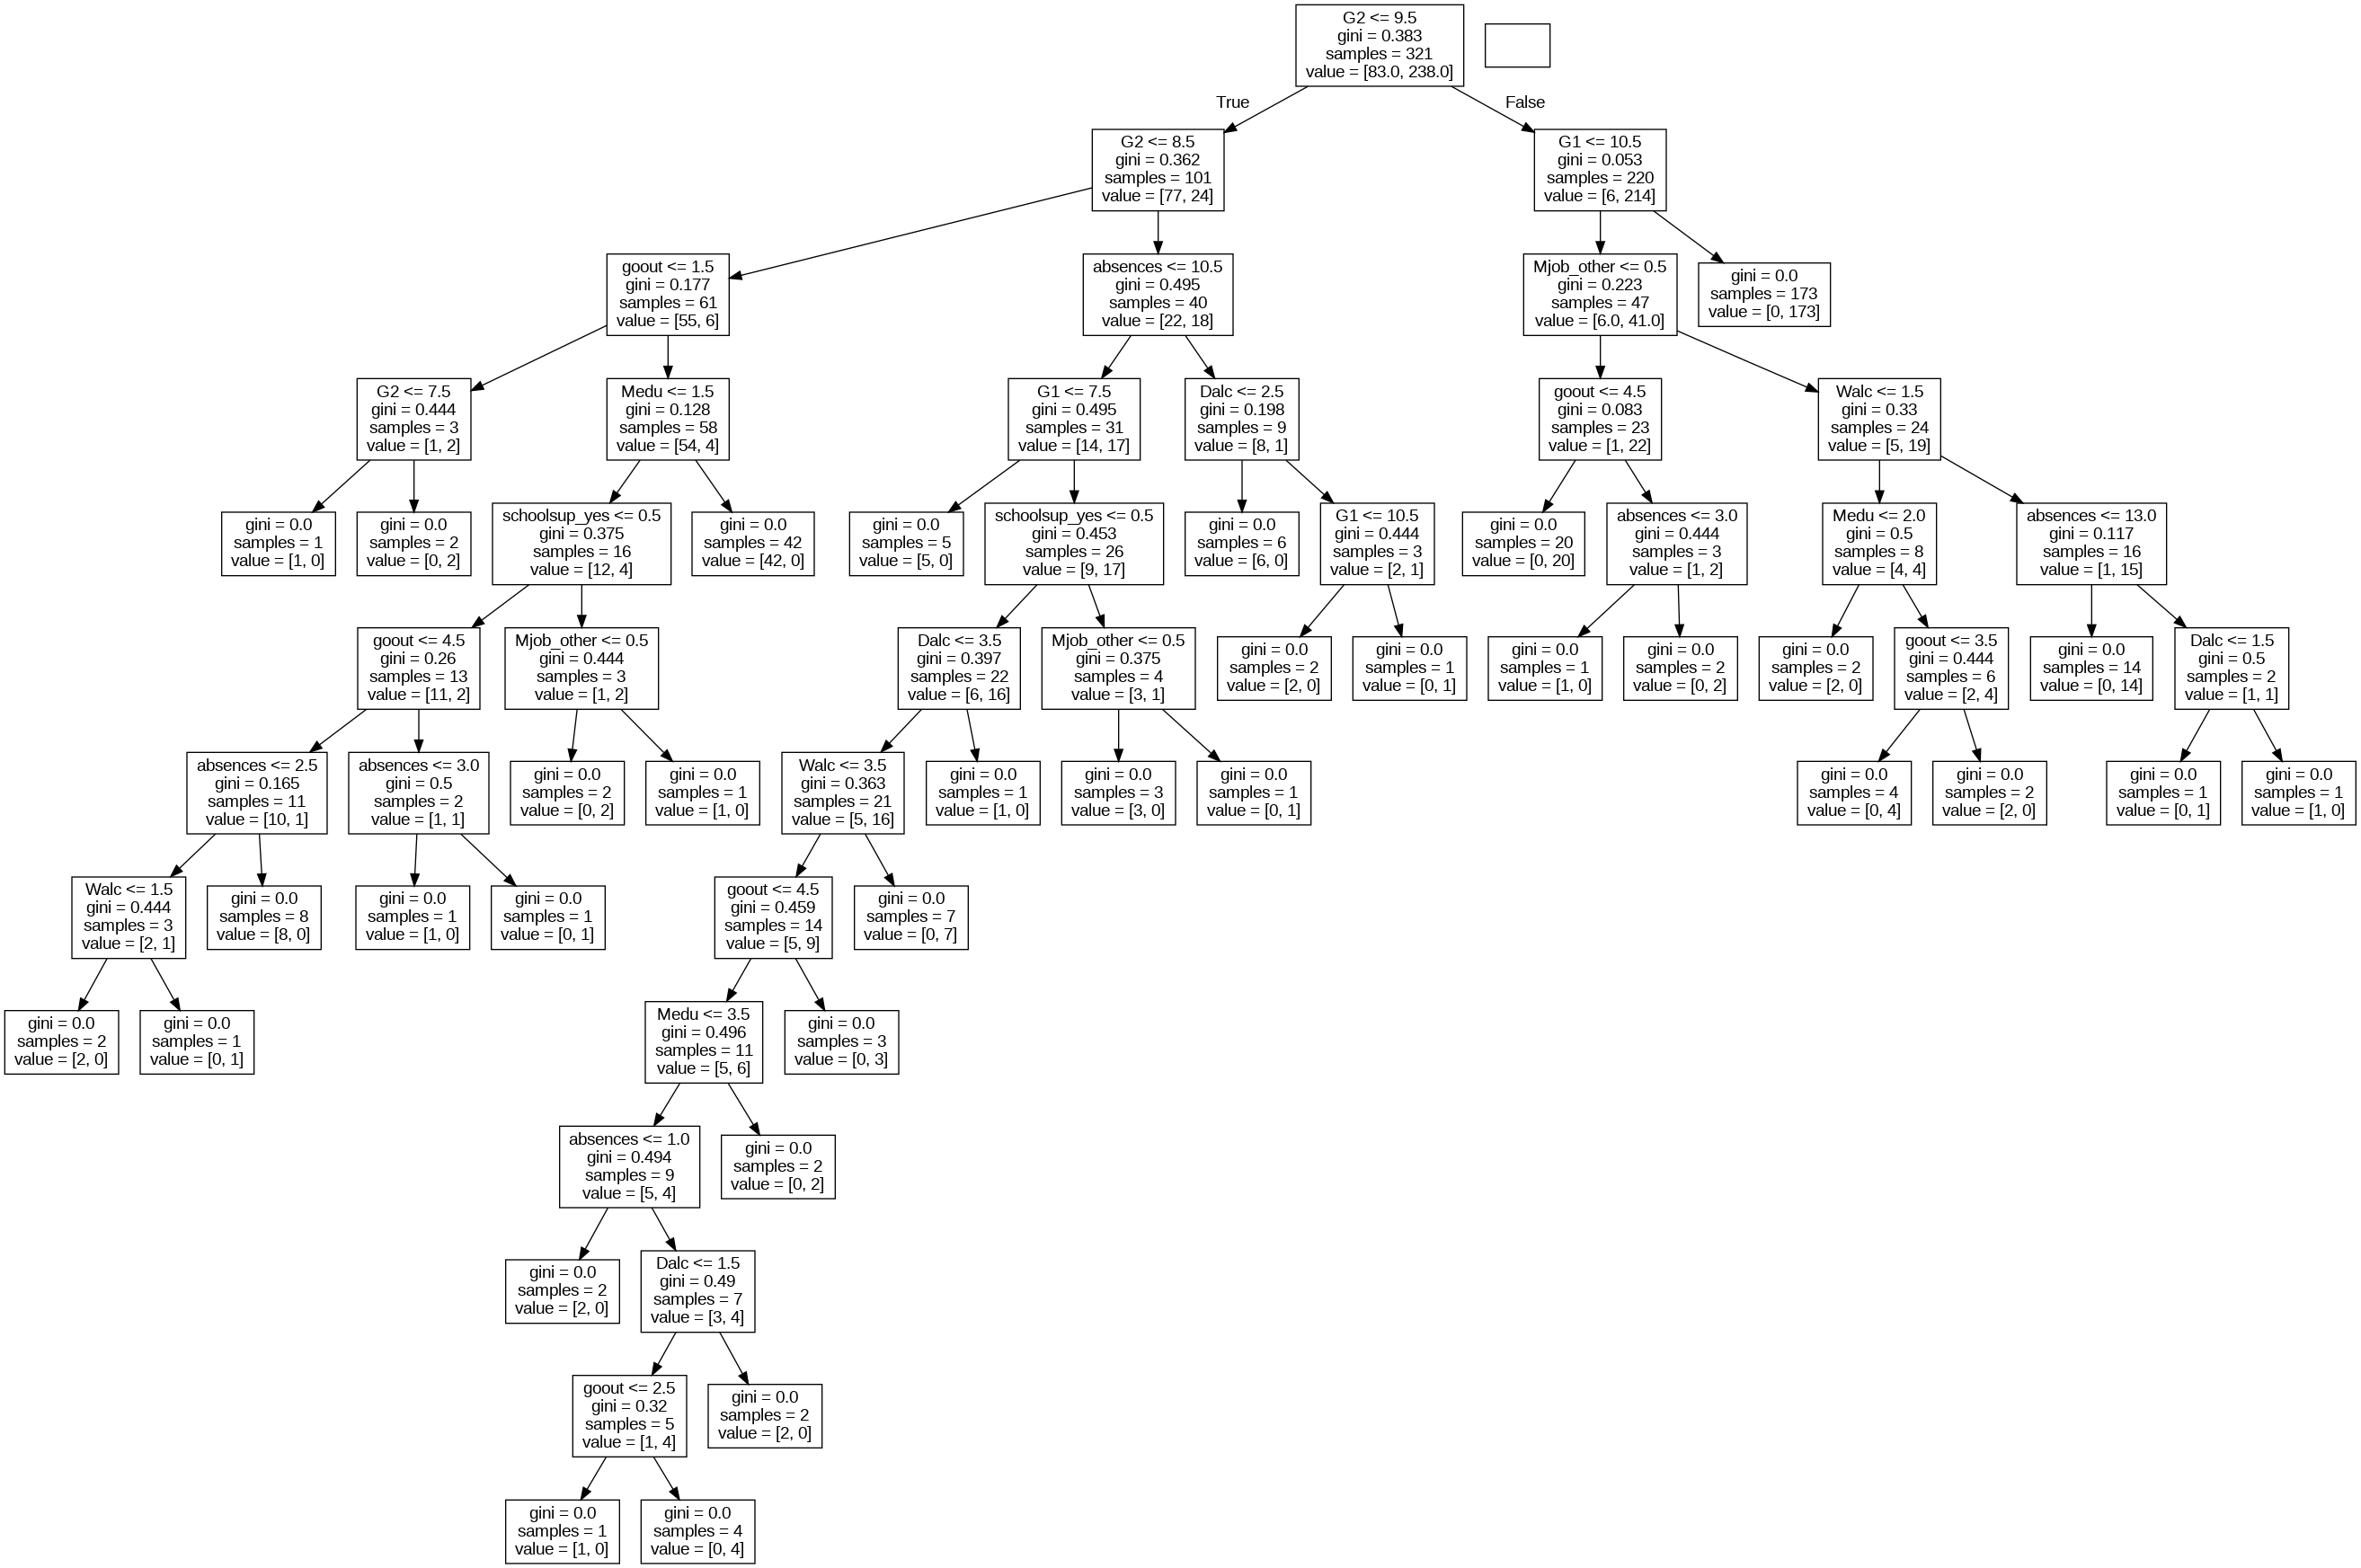

In [113]:
dot_data = StringIO()
tree.export_graphviz(decision_tree_model, out_file=dot_data, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

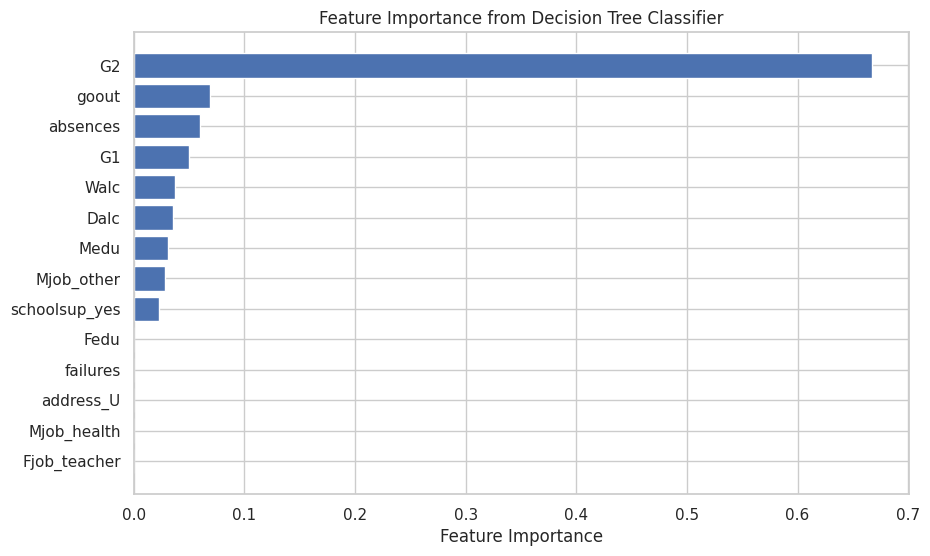

In [114]:
# Get feature importances
feature_importances = decision_tree_model.feature_importances_
# Match feature importances with feature names (assuming you have feature names in X_train.columns)
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

features, importances = zip(*sorted_feature_importances)

# Create a horizontal bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Decision Tree Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()

In [115]:
X_all_features_except_G3 = df_ohe.drop('G3',axis = 1)
y_G3 = df_ohe ['G3'].apply(lambda x: 'pass' if x >= 10 else 'fail')

In [116]:
train_binary_classification_model(X_all_features_except_G3, y_G3)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy Train Accuracy
LogisticRegression              0.972222       0.971963
MultinomialNB                       0.75       0.806854
BaggingClassifier               0.972222       0.990654
DecisionTreeClassifier          0.916667            1.0
LinearSVC                            1.0       0.978193
SGDClassifier                   0.972222       0.909657
KNeighborsClassifier            0.888889       0.922118
RandomForestClassifier          0.972222            1.0
GradientBoostingClassifier      0.972222            1.0